In [1]:
from yugiquery import *

header("Cards")

<div align='center'>
    <br>
    <!-- Pre Style needed to fix HTML formatting -->
    <pre style="line-height: var(--jp-code-line-height); font-family: var(--jp-code-font-family)">
    ██    ██ ██    ██  ██████  ██  ██████  ██    ██ ███████ ██████  ██    ██ 
     ██  ██  ██    ██ ██       ██ ██    ██ ██    ██ ██      ██   ██  ██  ██  
      ████   ██    ██ ██   ███ ██ ██    ██ ██    ██ █████   ██████    ████   
       ██    ██    ██ ██    ██ ██ ██ ▄▄ ██ ██    ██ ██      ██   ██    ██    
       ██     ██████   ██████  ██  ██████   ██████  ███████ ██   ██    ██    
                                      ▀▀                                     
    </pre>
</div>
<div align='right'>
    Cards - Execution started 31/07/2023 09:48 UTC <br>
    By <b>Guilherme Ruiz</b>
</div>

---

Table of Contents
=================

*   [1  Data aquisition](#Data-aquisition)
    *   [1.1  Fetch online data](#Fetch-online-data)
    *   [1.2  Merge data](#Merge-data)
*   [2  Check changes](#Check-changes)
    *   [2.1  Load previous data](#Load-previous-data)
    *   [2.2  Generate changelog](#Generate-changelog)
    *   [2.3  Save data](#Save-data)
*   [3  Data visualization](#Data-visualization)
    *   [3.1  Full data](#Full-data)
    *   [3.2  Card types](#Card-types)
    *   [3.3  Monsters](#Monsters)
        *   [3.3.1  Attributes](#Attributes)
        *   [3.3.2  Primary types](#Primary-types)
            *   [3.3.2.1  Has effect discrimination](#Has-effect-discrimination)
            *   [3.3.2.2  Is pendulum discrimination](#Is-pendulum-discrimination)
            *   [3.3.2.3  By attribute](#By-attribute)
        *   [3.3.3  Secondary types](#Secondary-types)
            *   [3.3.3.1  By attribute](#By-attribute)
            *   [3.3.3.2  By secondary type](#By-secondary-type)
        *   [3.3.4  Monster types](#Monster-types)
            *   [3.3.4.1  By Attribute](#By-Attribute)
            *   [3.3.4.2  By primary type](#By-primary-type)
            *   [3.3.4.3  By secondary type](#By-secondary-type)
        *   [3.3.5  Effect type](#Effect-type)
        *   [3.3.6  ATK](#ATK)
        *   [3.3.7  DEF](#DEF)
        *   [3.3.8  Level/Rank](#Level/Rank)
            *   [3.3.8.1  ATK statistics](#ATK-statistics)
            *   [3.3.8.2  DEF statistics](#DEF-statistics)
        *   [3.3.9  Pendulum scale](#Pendulum-scale)
            *   [3.3.9.1  ATK statistics](#ATK-statistics)
            *   [3.3.9.2  DEF statistics](#DEF-statistics)
            *   [3.3.9.3  Level/Rank statistics](#Level/Rank-statistics)
        *   [3.3.10  Link](#Link)
            *   [3.3.10.1  ATK statistics](#ATK-statistics)
        *   [3.3.11  Link Arrows](#Link-Arrows)
            *   [3.3.11.1  By combination](#By-combination)
            *   [3.3.11.2  By unique](#By-unique)
            *   [3.3.11.3  By link](#By-link)
    *   [3.4  Spell & Trap](#Spell-&-Trap)
        *   [3.4.1  Properties](#Properties)
        *   [3.4.2  Effect type](#Effect-type)
            *   [3.4.2.1  Spell & Trap discrimination](#Spell-&-Trap-discrimination)
    *   [3.5  Archseries](#Archseries)
        *   [3.5.1  By card type](#By-card-type)
        *   [3.5.2  By primary type](#By-primary-type)
        *   [3.5.3  By secondary type](#By-secondary-type)
        *   [3.5.4  By monster type](#By-monster-type)
        *   [3.5.5  By property](#By-property)
    *   [3.6  Artworks](#Artworks)
        *   [3.6.1  By card type](#By-card-type)
        *   [3.6.2  By primary type](#By-primary-type)
    *   [3.7  Errata](#Errata)
        *   [3.7.1  By card type](#By-card-type)
        *   [3.7.2  By primary type](#By-primary-type)
        *   [3.7.3  By artwork](#By-artwork)
    *   [3.8  TCG & OCG status](#TCG-&-OCG-status)
        *   [3.8.1  TGC status](#TGC-status)
            *   [3.8.1.1  By card type](#By-card-type)
            *   [3.8.1.2  By monster type](#By-monster-type)
            *   [3.8.1.3  By archseries](#By-archseries)
        *   [3.8.2  OCG status](#OCG-status)
            *   [3.8.2.1  By card type](#By-card-type)
            *   [3.8.2.2  By monster type](#By-monster-type)
            *   [3.8.2.3  By archseries](#By-archseries)
        *   [3.8.3  TCG vs. OCG status](#TCG-vs.-OCG-status)
*   [4  Extras](#Extras)
    *   [4.1 Multiple secondary types](#Multiple-secondary-types)
    *   [4.2 Not yet released](#Not-yet-released)
    *   [4.3 Counters and Tokens](#Counters-and-Tokens)
*   [5  Epilogue](#Epilogue)
    *   [5.1  HTML export](#HTML-export)
<!-- *   [5.2  Git](#Git) -->

# Data aquisition

## Fetch online data

In [2]:
# Timestamp
timestamp = pd.Timestamp.now()

In [3]:
# Fetch Monster
monster_df = fetch_monster()

8206 results


In [4]:
# Fetch Spell
spell_df = fetch_st(st="Spell")

# Fetch Trap
trap_df = fetch_st(st="Trap")

2472 results


1873 results


In [5]:
# Fetch Token
token_df = fetch_token()

# Fetch Counter
counter_df = fetch_counter()

# Fetch errata
errata_df = fetch_errata()

117 results


13 results


4895 results


## Merge data

In [6]:
# Merge errata
monster_df = merge_errata(monster_df, errata_df)
spell_df = merge_errata(spell_df, errata_df)
trap_df = merge_errata(trap_df, errata_df)
token_df = merge_errata(token_df, errata_df)
counter_df = merge_errata(counter_df, errata_df)

# Add counters to tokens data frame
token_df = (
    pd.concat([token_df, counter_df], ignore_index=True, axis=0)
    .drop_duplicates()
    .sort_values("Name", ignore_index=True)
)

# Create combined spell and trap data frame
st_df = pd.concat([spell_df, trap_df], ignore_index=True, axis=0).sort_values(
    "Name", ignore_index=True
)

# Create combined monster, spell and trap data frames
cards_df = pd.concat([st_df, monster_df], ignore_index=True, axis=0).sort_values(
    "Name", ignore_index=True
)

# Create combined data frames with full data
full_df = pd.concat([cards_df, token_df], ignore_index=True, axis=0).sort_values(
    "Name", ignore_index=True
)

print("Data merged")

Data merged

# Check changes

## Load previous data

In [7]:
# Get list of files
files_list = sorted(
    glob.glob("../data/all_cards_*.csv"), key=os.path.getctime, reverse=True
)
# Get second newest file if exist
if files_list:
    latest_file = files_list[0]
    # Load csv avoiding converting "NA" to NaN
    previous_df = pd.read_csv(
        latest_file, dtype=object, keep_default_na=False, na_values=[""]
    )
    # Correct tuples
    tuple_cols = [
        "Effect type",
        "Secondary type",
        "Link Arrows",
        "Archseries",
        "Artwork",
        "Errata",
    ]
    for col in tuple_cols:
        previous_df[col] = previous_df[col].dropna().apply(literal_eval)
    # Force dtypes to match current df
    previous_df = previous_df.astype(
        full_df[previous_df.columns.intersection(full_df.columns)].dtypes.to_dict()
    )
    previous_ts = pd.to_datetime(
        os.path.basename(latest_file).split("_")[-1].split(".csv")[0]
    )
    print("File loaded")
else:
    previous_df = None
    print("No older files")

File loaded

## Generate changelog

In [8]:
if previous_df is None:
    changelog = None
    print("Skipped")
else:
    changelog = generate_changelog(previous_df, full_df, col="Name")
    if not changelog.empty:
        display(changelog)
        changelog.to_csv(
            f'../data/cards_changelog_{previous_ts.isoformat(timespec="minutes")}_{timestamp.isoformat(timespec="minutes")}.csv',
            index=True,
        )
        print("Changelog saved")

Password  \
Name                                   
"Infernoble Arms - Almace"  98319530   
"Infernoble Arms - Almace"  98319530   
Agnimal Candle              13014905   
Agnimal Candle              13014905   
Albaz the Shrouded               NaN   
...                              ...   
Wheel Synchron              60283232   
You're Finished             88346805   
You're Finished             88346805   
Zuttomozaurus               24454387   
Zuttomozaurus               24454387   

                                                                  Effect type  \
Name                                                                            
"Infernoble Arms - Almace"  (Condition, Ignition-like Effect, Trigger Effect)   
"Infernoble Arms - Almace"  (Condition, Ignition-like Effect, Trigger Effect)   
Agnimal Candle                                    (Condition, Trigger Effect)   
Agnimal Candle                                    (Condition, Trigger Effect)   
Albaz the Shrouded                                                        NaN   
...                                                                       ...   
Wheel Synchron              (Condition, Ignition Effect, Unclassified effect)   
You're Finished                                        (Effect, Quick Effect)   
You're Finished                                        (Effect, Quick Effect)   
Zuttomozaurus                 (Condition, Continuous Effect, Ignition Effect)   
Zuttomozaurus                 (Condition, Continuous Effect, Ignition Effect)   

                                  TCG status                   Page name  \
Name                                                                       
"Infernoble Arms - Almace"  Not yet released  "Infernoble Arms - Almace"   
"Infernoble Arms - Almace"         Unlimited  "Infernoble Arms - Almace"   
Agnimal Candle              Not yet released              Agnimal Candle   
Agnimal Candle                     Unlimited              Agnimal Candle   
Albaz the Shrouded                     Legal          Albaz the Shrouded   
...                                      ...                         ...   
Wheel Synchron                     Unlimited              Wheel Synchron   
You're Finished             Not yet released             You're Finished   
You're Finished                    Unlimited             You're Finished   
Zuttomozaurus               Not yet released               Zuttomozaurus   
Zuttomozaurus                      Unlimited               Zuttomozaurus   

                                                                     Page URL  \
Name                                                                            
"Infernoble Arms - Almace"  https://yugipedia.com/wiki/%22Infernoble_Arms_...   
"Infernoble Arms - Almace"  https://yugipedia.com/wiki/%22Infernoble_Arms_...   
Agnimal Candle                      https://yugipedia.com/wiki/Agnimal_Candle   
Agnimal Candle                      https://yugipedia.com/wiki/Agnimal_Candle   
Albaz the Shrouded              https://yugipedia.com/wiki/Albaz_the_Shrouded   
...                                                                       ...   
Wheel Synchron                      https://yugipedia.com/wiki/Wheel_Synchron   
You're Finished                  https://yugipedia.com/wiki/You%27re_Finished   
You're Finished                  https://yugipedia.com/wiki/You%27re_Finished   
Zuttomozaurus                        https://yugipedia.com/wiki/Zuttomozaurus   
Zuttomozaurus                        https://yugipedia.com/wiki/Zuttomozaurus   

                           Artwork   Modification date Errata    Primary type  \
Name                                                                            
"Infernoble Arms - Almace"     NaN 2023-07-20 00:23:39    NaN             NaN   
"Infernoble Arms - Almace"     NaN 2023-07-28 05:54:45    NaN             NaN   
Agnimal Candle                 NaN 2023-07-20 01:19:28    NaN  Effect Monster   
Agnim

Changelog saved

## Save data

In [9]:
if changelog is not None and changelog.empty:
    print("No changes. New data not saved")
else:
    full_df.to_csv(
        f'../data/all_cards_{timestamp.isoformat(timespec="minutes")}.csv', index=False
    )
    print("Data saved")

Data saved

# Data visualization

## Full data

In [10]:
full_df

Name  Password     Card type  \
0           "A" Cell Breeding Device  34541863    Spell Card   
1                 "A" Cell Incubator  64163367    Spell Card   
2      "A" Cell Recombination Device  91231901    Spell Card   
3             "A" Cell Scatter Burst  73262676    Spell Card   
4         "Infernoble Arms - Almace"  98319530    Spell Card   
...                              ...       ...           ...   
12676        Zubababancho Gagagacoat  23720856  Monster Card   
12677      Zuijin of the Ice Barrier  43256007  Monster Card   
12678     Zure, Knight of Dark World  07459013  Monster Card   
12679      Zushin the Sleeping Giant  67547370  Monster Card   
12680                  Zuttomozaurus  24454387  Monster Card   

                    Property                     Archseries  \
0      Continuous Spell Card                            NaN   
1      Continuous Spell Card                            NaN   
2      Quick-Play Spell Card                            NaN   
3      Quick-Play Spell Card                            NaN   
4           Equip Spell Card  (Infernoble Arms, Noble Arms)   
...                      ...                            ...   
12676                    NaN               (Gagaga, Zubaba)   
12677                    NaN                 (Ice Barrier,)   
12678                    NaN                  (Dark World,)   
12679                    NaN                            NaN   
12680                    NaN                            NaN   

                                             Effect type TCG status  \
0                                      (Trigger Effect,)  Unlimited   
1               (Continuous-like Effect, Trigger Effect)  Unlimited   
2                         (Effect, Ignition-like Effect)  Unlimited   
3                                              (Effect,)  Unlimited   
4      (Condition, Ignition-like Effect, Trigger Effect)  Unlimited   
...                                                  ...        ...   
12676                       (Condition, Ignition Effect)  Unlimited   
12677                       (Condition, Ignition Effect)  Unlimited   
12678                                                NaN  Unlimited   
12679  (Continuous Effect, Ignition Effect, Summoning...  Unlimited   
12680    (Condition, Continuous Effect, Ignition Effect)  Unlimited   

      OCG status                      Page name  \
0      Unlimited       "A" Cell Breeding Device   
1      Unlimited             "A" Cell Incubator   
2      Unlimited  "A" Cell Recombination Device   
3      Unlimited         "A" Cell Scatter Burst   
4      Unlimited     "Infernoble Arms - Almace"   
...          ...                            ...   
12676  Unlimited        Zubababancho Gagagacoat   
12677  Unlimited      Zuijin of the Ice Barrier   
12678  Unlimited     Zure, Knight of Dark World   
12679  Unlimited      Zushin the Sleeping Giant   
12680        NaN                  Zuttomozaurus   

                                                Page URL Artwork  \
0      https://yugipedia.com/wiki/%22A%22_Cell_Breedi...     NaN   
1      https://yugipedia.com/wiki/%22A%22_Cell_Incubator     NaN   
2      https://yugipedia.com/wiki/%22A%22_Cell_Recomb...     NaN   
3      https://yugipedia.com/wiki/%22A%22_Cell_Scatte...     NaN   
4      https://yugipedia.com/wiki/%22Infernoble_Arms_...     NaN   
...                                                  ...     ...   
12676  https://yugipedia.com/wiki/Zubababancho_Gagaga...     NaN   
12677  https://yugipedia.com/wiki/Zuijin_of_the_Ice_B...     NaN   
12678  https://yugipedia.com/wiki/Zure,_Knight_of_Dar...     NaN   
12679  https://yugipedia.com/wiki/Zushin_the_Sleeping...     NaN   
12680           https://yugipedia.com/wiki/Zuttomozaurus     NaN   

        Modification date   Errata Attribute    Primary type Secondary type  \
0     2023-07-27 08:40:07  (Name,)       NaN             NaN            NaN   
1     2023-03-17 23:21:41      NaN       NaN             NaN     

Full data available to download [here](../data)

## Card types

In [11]:
print("Total number of card types:", cards_df["Card type"].nunique())

Total number of card types:

3

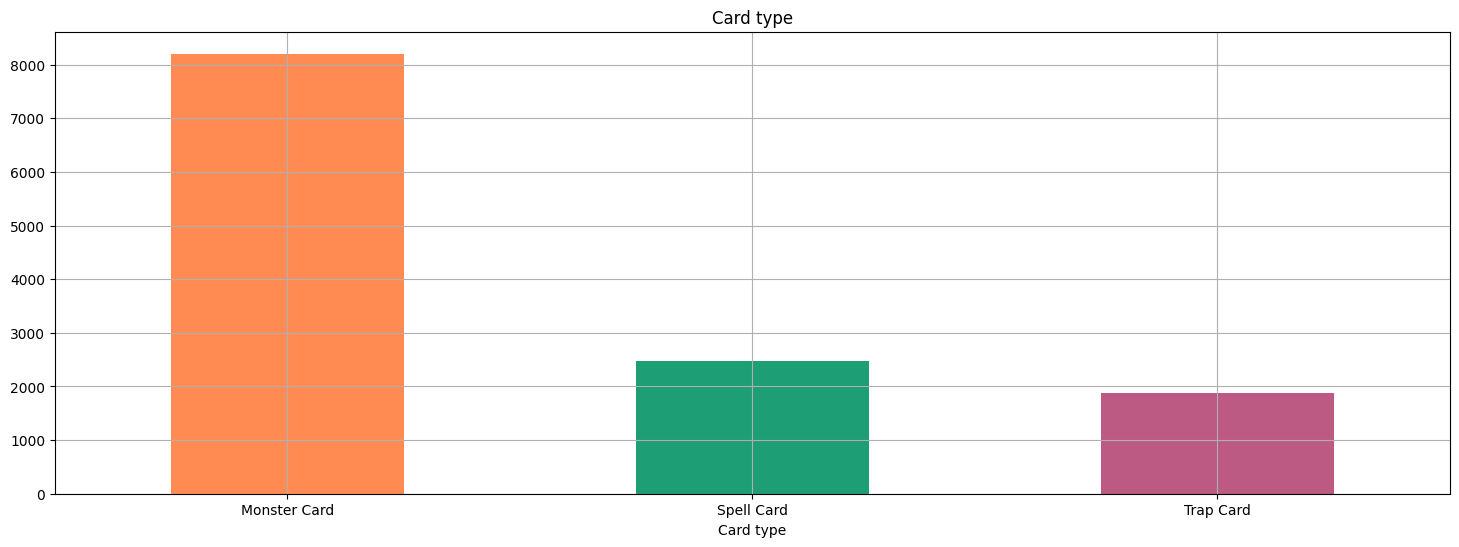

In [12]:
card_type_colors = [colors_dict[i] for i in full_df["Card type"].value_counts().index]
cards_df["Card type"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=card_type_colors, title="Card type"
)
plt.show()

## Monsters

### Attributes

In [13]:
print("Total number of attributes:", monster_df["Attribute"].nunique())

Total number of attributes:

7

In [14]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Attribute"
).nunique()

Name  Password  Archseries  Primary type  Secondary type  \
Attribute                                                             
DARK       2281      2268         478             7               7   
DIVINE        6         0           3             1               0   
EARTH      1905      1896         343             7               6   
FIRE        718       714         201             7               7   
LIGHT      1661      1640         401             7               7   
WATER       850       849         213             7               6   
WIND        777       775         223             7               6   

           Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
Attribute                                                                      
DARK                 24          156   64              12     6           42   
DIVINE                2            6    4               0     0            0   
EARTH                24          126   61              12     4           29   
FIRE                 23           85   40               8     4           23   
LIGHT                24          136   50              12     5           30   
WATER                22           95   41               9     4           16   
WIND                 24          105   38              11     4           14   

           ATK  Level/Rank  TCG status  OCG status  Artwork  \
Attribute                                                     
DARK        71          13           5           6        3   
DIVINE       4           2           2           2        1   
EARTH       72          12           4           6        3   
FIRE        43          12           3           5        3   
LIGHT       58          14           5           5        3   
WATER       57          12           5           4        3   
WIND        47          12           5           4        3   

           Modification date  Errata  
Attribute                             
DARK                    2280       4  
DIVINE                     9       3  
EARTH                   1904       4  
FIRE                     718       4  
LIGHT                   1661       4  
WATER                    848       4  
WIND                     777       4

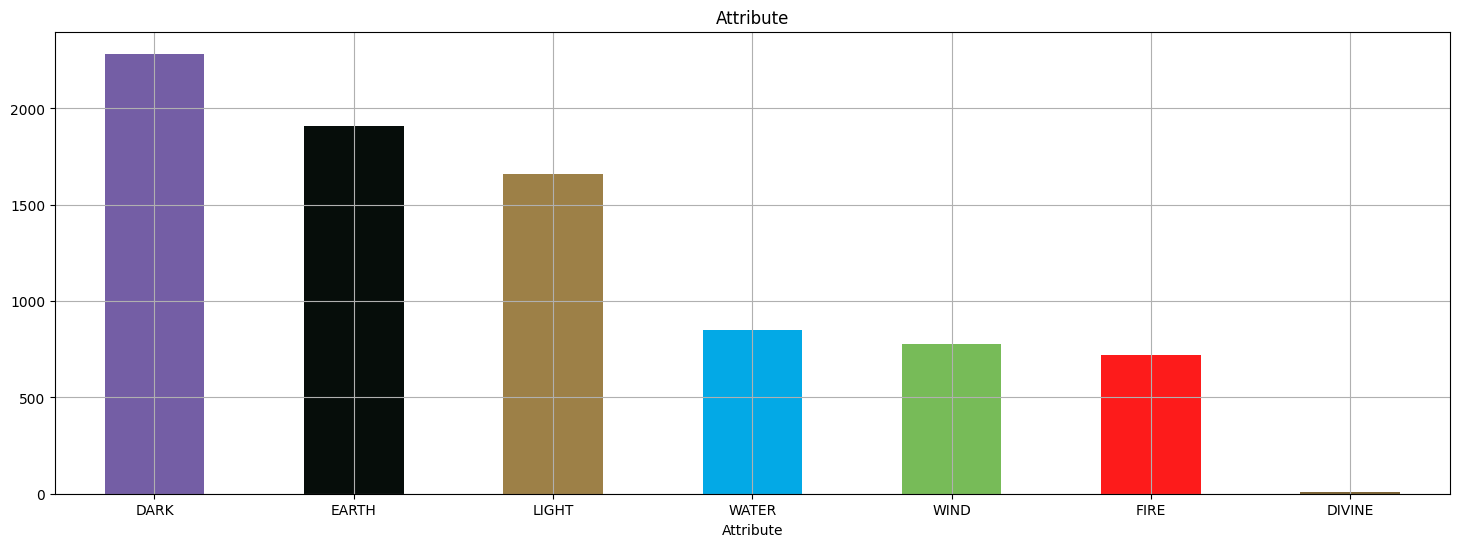

In [15]:
attribute_colors = [
    colors_dict[i] for i in monster_df["Attribute"].value_counts().index
]
monster_df["Attribute"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=attribute_colors, title="Attribute"
)
plt.show()

### Primary types

In [16]:
print("Total number of primary types:", monster_df["Primary type"].nunique())

Total number of primary types:

7

In [17]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Primary type"
).nunique()

Name  Password  Archseries  Attribute  Secondary type  \
Primary type                                                             
Effect Monster   5575      5539         806          7               8   
Fusion Monster    453       452         149          6               1   
Link Monster      385       378         142          6               0   
Normal Monster    710       704         112          6               1   
Ritual Monster    129       129          38          6               3   
Synchro Monster   439       437         166          6               1   
Xyz Monster       511       503         202          6               0   

                 Monster type  Effect type  DEF  Pendulum Scale  Link  \
Primary type                                                            
Effect Monster             26          208   67              14     0   
Fusion Monster             24           69   47               5     0   
Link Monster               23           52    0               0     6   
Normal Monster             23            6   48              10     0   
Ritual Monster             15           35   26               1     0   
Synchro Monster            23           58   38               4     0   
Xyz Monster                23           73   42               5     0   

                 Link Arrows  ATK  Level/Rank  TCG status  OCG status  \
Primary type                                                            
Effect Monster             0   75          12           5           6   
Fusion Monster             0   50          12           3           4   
Link Monster              62   39           0           4           6   
Normal Monster             0   58           8           4           3   
Ritual Monster             0   35          12           1           1   
Synchro Monster            0   41          13           4           4   
Xyz Monster                0   51          14           4           5   

                 Artwork  Modification date  Errata  
Primary type                                         
Effect Monster         3               5561       4  
Fusion Monster         3                453       4  
Link Monster           3                385       3  
Normal Monster         3                711       4  
Ritual Monster         1                128       4  
Synchro Monster        2                439       4  
Xyz Monster            2                511       4

#### Has effect discrimination

In [18]:
effect = pd.crosstab(
    monster_df["Primary type"],
    pd.isna(monster_df["Effect type"]),
    rownames=["Primary type"],
    colnames=["Has effect"],
).rename(columns={True: "No Effect", False: "Effect"})
effect

Has effect       Effect  No Effect
Primary type                      
Effect Monster     5574          1
Fusion Monster      392         61
Link Monster        380          5
Normal Monster       34        677
Ritual Monster      114         15
Synchro Monster     436          3
Xyz Monster         509          2

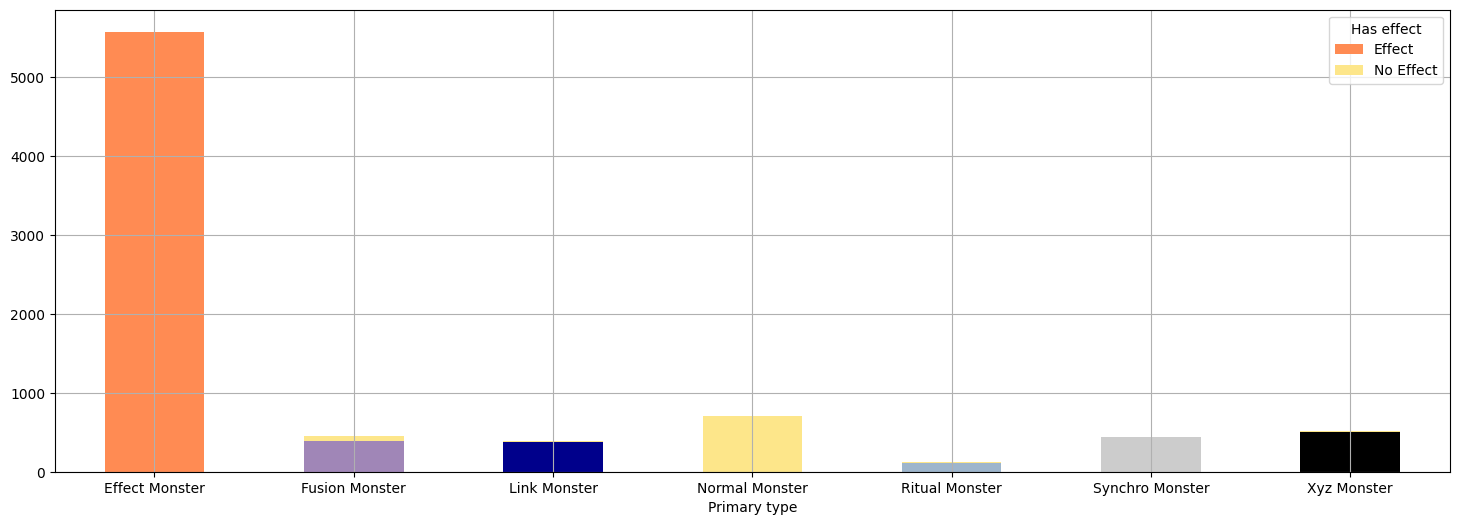

In [19]:
monster_type_colors = {
    "No Effect": colors_dict["Normal Monster"],
    "Effect": [colors_dict[i] for i in effect.index],
}
effect.plot.bar(
    figsize=(18, 6),
    stacked=True,
    grid=True,
    rot=0,
    legend=True,
    color=monster_type_colors,
)
# plt.yscale('log')
plt.show()

Obs: Normal monster can have effect if it is pendulum

#### Is pendulum discrimination

In [20]:
pendulum = pd.crosstab(
    monster_df["Primary type"],
    pd.isna(monster_df["Pendulum Scale"]),
    rownames=["Primary type"],
    colnames=["Is Pendulum"],
).rename(columns={True: "Not Pendulum", False: "Pendulum"})
pendulum

Is Pendulum      Pendulum  Not Pendulum
Primary type                           
Effect Monster        273          5302
Fusion Monster         11           442
Link Monster            0           385
Normal Monster         38           673
Ritual Monster          1           128
Synchro Monster         7           432
Xyz Monster             9           502

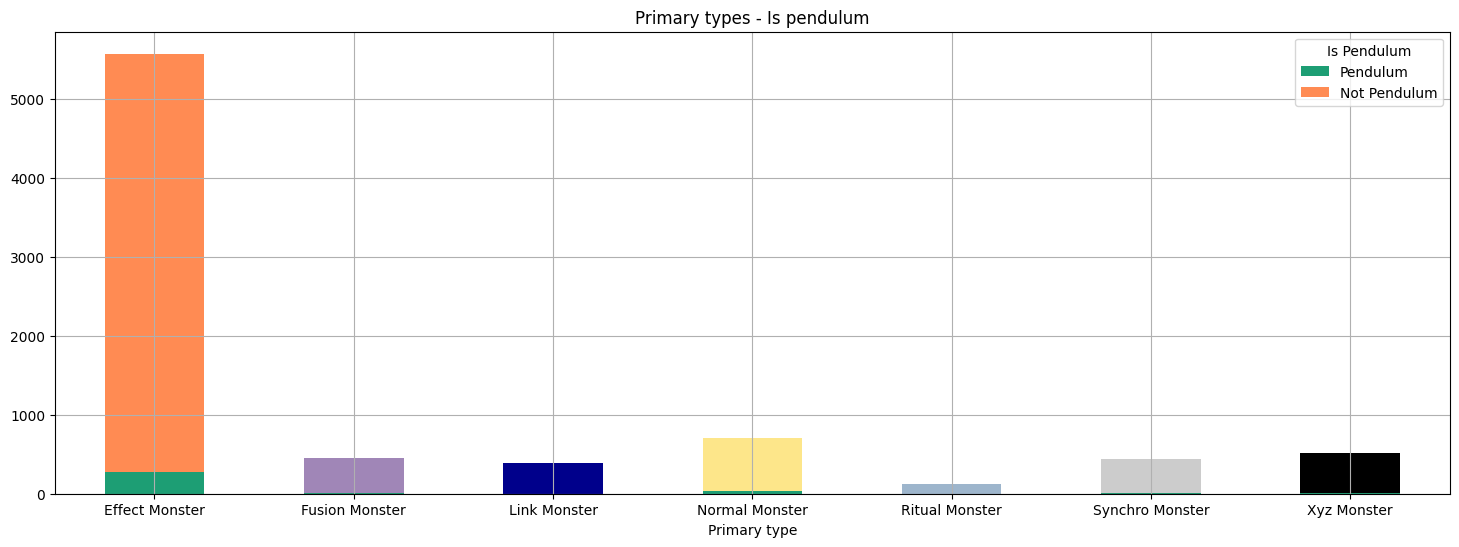

In [21]:
monster_type_colors_b = {
    "Pendulum": colors_dict["Pendulum Monster"],
    "Not Pendulum": [colors_dict[i] for i in pendulum.index],
}
pendulum.plot.bar(
    figsize=(18, 6),
    stacked=True,
    grid=True,
    rot=0,
    color=monster_type_colors_b,
    legend=True,
    title="Primary types - Is pendulum",
)
plt.show()

#### By attribute

In [22]:
primmary_crosstab = pd.crosstab(cards_df["Primary type"], cards_df["Attribute"])
primmary_crosstab

Attribute        DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Primary type                                                  
Effect Monster   1523       6   1333   491   1124    560   538
Fusion Monster    159       0     82    35    103     36    38
Link Monster      131       0     76    36     88     29    25
Normal Monster    173       0    243    52     73    106    64
Ritual Monster     42       0     17     7     35     20     8
Synchro Monster   116       0     73    53     84     39    74
Xyz Monster       140       0     83    44    154     60    30

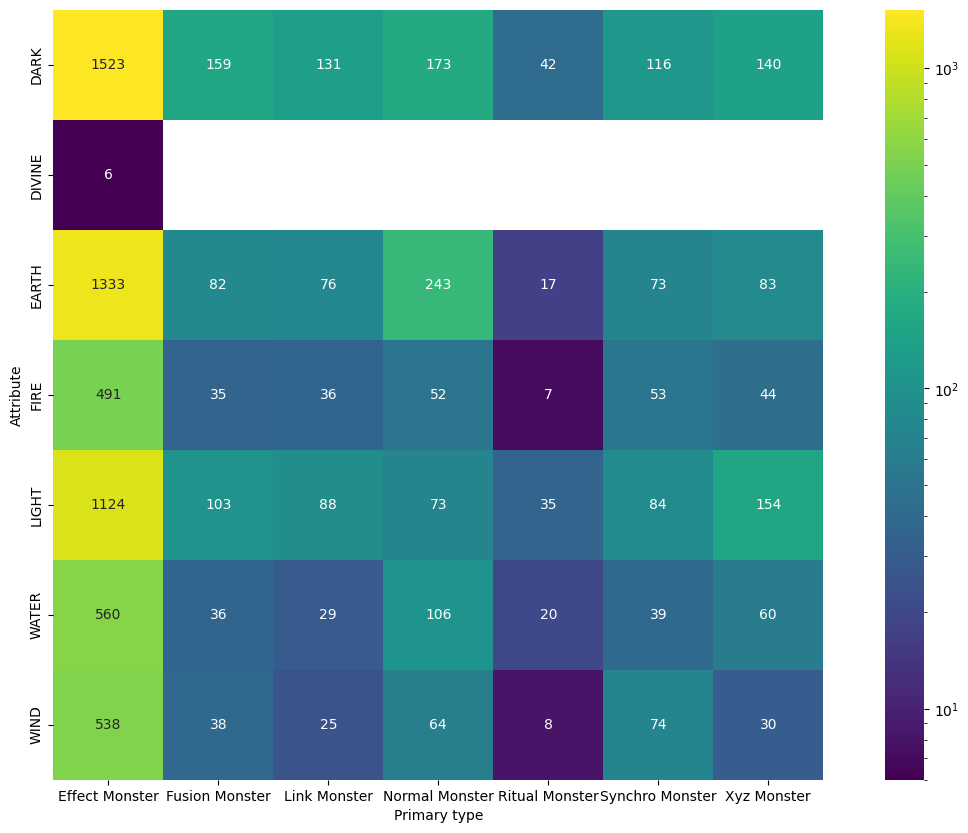

In [23]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    primmary_crosstab.T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

### Secondary types

In [24]:
exploded_secondary_type = monster_df.explode("Secondary type")
print(
    "Total number of secondary types:",
    exploded_secondary_type["Secondary type"].nunique(),
)

Total number of secondary types:

6

In [25]:
exploded_secondary_type.drop(
    columns=["Card type", "Link", "Link Arrows", "Page name", "Page URL"]
).groupby("Secondary type").nunique()

Name  Password  Archseries  Attribute  Primary type  \
Secondary type                                                        
Flip monster     187       186          46          6             2   
Gemini monster    45        45          13          6             1   
Spirit monster    41        41           4          6             2   
Toon monster      17        17          13          6             1   
Tuner monster    506       505         143          6             5   
Union monster     37        37           9          6             1   

                Monster type  Effect type  DEF  Pendulum Scale  ATK  \
Secondary type                                                        
Flip monster              19           21   33               1   38   
Gemini monster            18            6   19               0   17   
Spirit monster            13           10   21               2   22   
Toon monster               7            8   15               0   12   
Tuner monster             23           62   32               7   32   
Union monster              9            6   14               0   17   

                Level/Rank  TCG status  OCG status  Artwork  \
Secondary type                                                
Flip monster            12           3           4        1   
Gemini monster           8           1           1        0   
Spirit monster          10           1           1        1   
Toon monster             5           1           2        1   
Tuner monster            9           4           5        3   
Union monster            8           1           1        1   

                Modification date  Errata  
Secondary type                             
Flip monster                  187       4  
Gemini monster                 45       4  
Spirit monster                 41       2  
Toon monster                   17       3  
Tuner monster                 506       4  
Union monster                  37       3

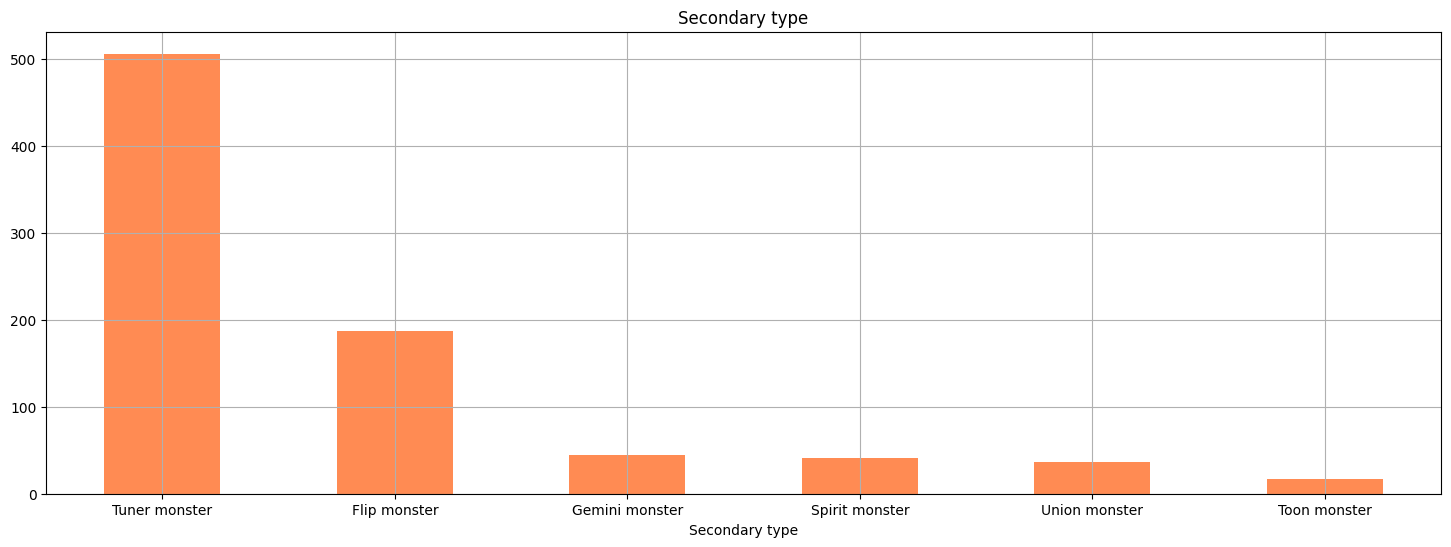

In [26]:
secondary_type_colors = colors_dict["Effect Monster"]
exploded_secondary_type["Secondary type"].value_counts().plot.bar(
    figsize=(18, 6),
    stacked=True,
    grid=True,
    rot=0,
    color=secondary_type_colors,
    legend=False,
    title="Secondary type",
)
plt.show()

#### By attribute

In [27]:
secondary_crosstab = pd.crosstab(
    exploded_secondary_type["Secondary type"], exploded_secondary_type["Attribute"]
)
secondary_crosstab

Attribute       DARK  EARTH  FIRE  LIGHT  WATER  WIND
Secondary type                                       
Flip monster      51     63    10     33     13    17
Gemini monster    11      8     8      6      8     4
Spirit monster     5      6     6      5      6    13
Toon monster       7      5     1      2      1     1
Tuner monster    129     97    51    106     53    70
Union monster      6      9     3     12      4     3

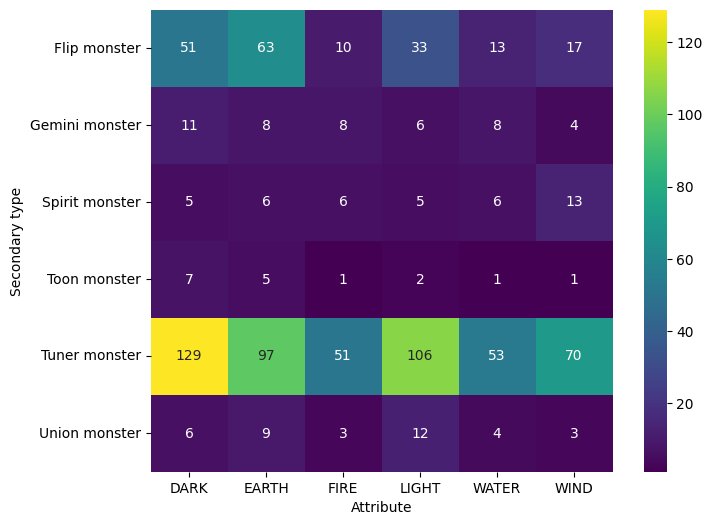

In [28]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    secondary_crosstab[secondary_crosstab > 0],
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
)
plt.show()

#### By secondary type

In [29]:
secondary_crosstab_b = pd.crosstab(
    exploded_secondary_type["Primary type"],
    exploded_secondary_type["Secondary type"],
    margins=True,
)
secondary_crosstab_b

Secondary type   Flip monster  Gemini monster  Spirit monster  Toon monster  \
Primary type                                                                  
Effect Monster            186              45              37            17   
Fusion Monster              0               0               0             0   
Normal Monster              0               0               0             0   
Ritual Monster              1               0               4             0   
Synchro Monster             0               0               0             0   
All                       187              45              41            17   

Secondary type   Tuner monster  Union monster  All  
Primary type                                        
Effect Monster             455             37  777  
Fusion Monster               3              0    3  
Normal Monster              12              0   12  
Ritual Monster               2              0    7  
Synchro Monster             34              0   34  
All                        506             37  833

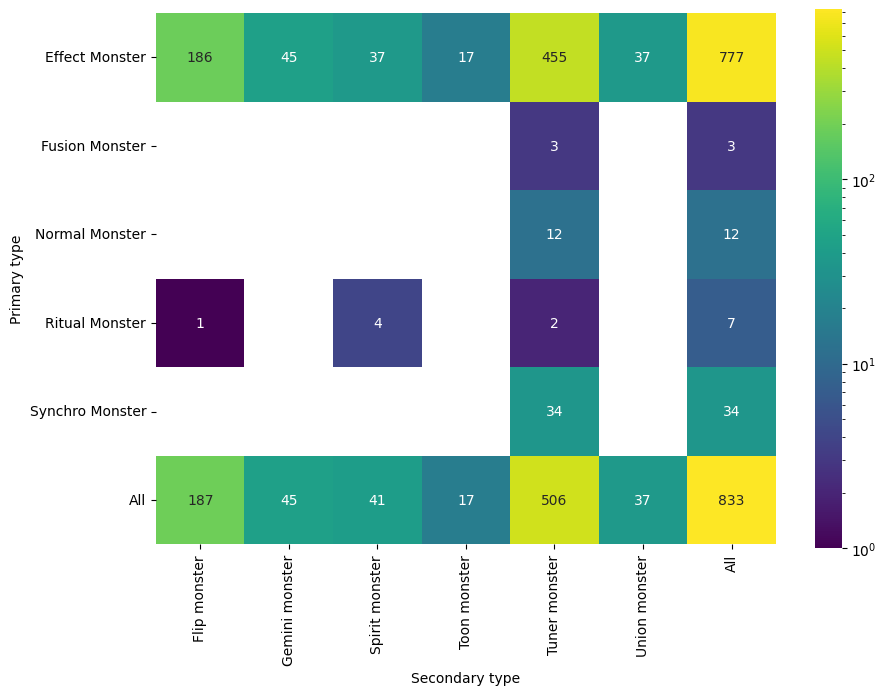

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    secondary_crosstab_b,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

### Monster types

In [31]:
print("Total number of monster types:", monster_df["Monster type"].nunique())

Total number of monster types:

26

In [32]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "Monster type"
).nunique()

Name  Password  Archseries  Attribute  Primary type  \
Monster type                                                         
Aqua            261       261          68          6             7   
Beast           383       378          89          6             7   
Beast-Warrior   244       240          50          6             7   
Creator God       1         0           1          1             1   
Cyberse         261       261          37          6             7   
Dinosaur        135       135          26          6             6   
Divine-Beast      5         0           2          1             1   
Dragon          674       670         195          6             7   
Fairy           526       521         121          6             7   
Fiend           783       780         158          6             7   
Fish            128       128          21          5             7   
Illusion          6         6           1          5             2   
Insect          253       253          40          6             7   
Machine         940       935         172          6             7   
Plant           237       236          39          6             6   
Psychic         181       180          44          6             6   
Pyro            135       134          41          5             6   
Reptile         174       174          35          6             6   
Rock            250       249          75          6             7   
Sea Serpent      84        84          28          6             6   
Spellcaster     693       684         155          6             7   
Thunder         132       131          35          6             6   
Warrior        1058      1053         230          6             7   
Winged Beast    319       316          67          6             7   
Wyrm             90        89          23          6             6   
Zombie          244       244          36          6             7   

               Secondary type  Effect type  DEF  Pendulum Scale  Link  \
Monster type                                                            
Aqua                        6           52   34               3     2   
Beast                       4           61   38               7     2   
Beast-Warrior               3           57   31               6     3   
Creator God                 0            1    1               0     0   
Cyberse                     1           45   29               1     6   
Dinosaur                    1           36   32               4     2   
Divine-Beast                0            5    4               0     0   
Dragon                      6          109   48              10     5   
Fairy                       5           83   38               9     4   
Fiend                       6          109   45              12     5   
Fish                        2           31   28               1     1   
Illusion                    0            5    6               0     0   
Insect                      3           58   33               2     3   
Machine                     7          115   55               9     4   
Plant                       4           38   30               5     4   
Psychic                     2           43   31               5     2   
Pyro                        5           38   32               0     1   
Reptile                     3           46   31               3     2   
Rock                        4           60   40               4     3   
Sea Serpent                 3           32   26               1     2   
Spellcaster                 6          101   42              11     5   
Thunder                     4           40   29               1     2   
Warrior                     6           95   41               8     4   
Winged Beast                5           61   29               4     4   
Wyrm                        1           33   25               3     4   
Zombie                      6           52   37               2     3   

         

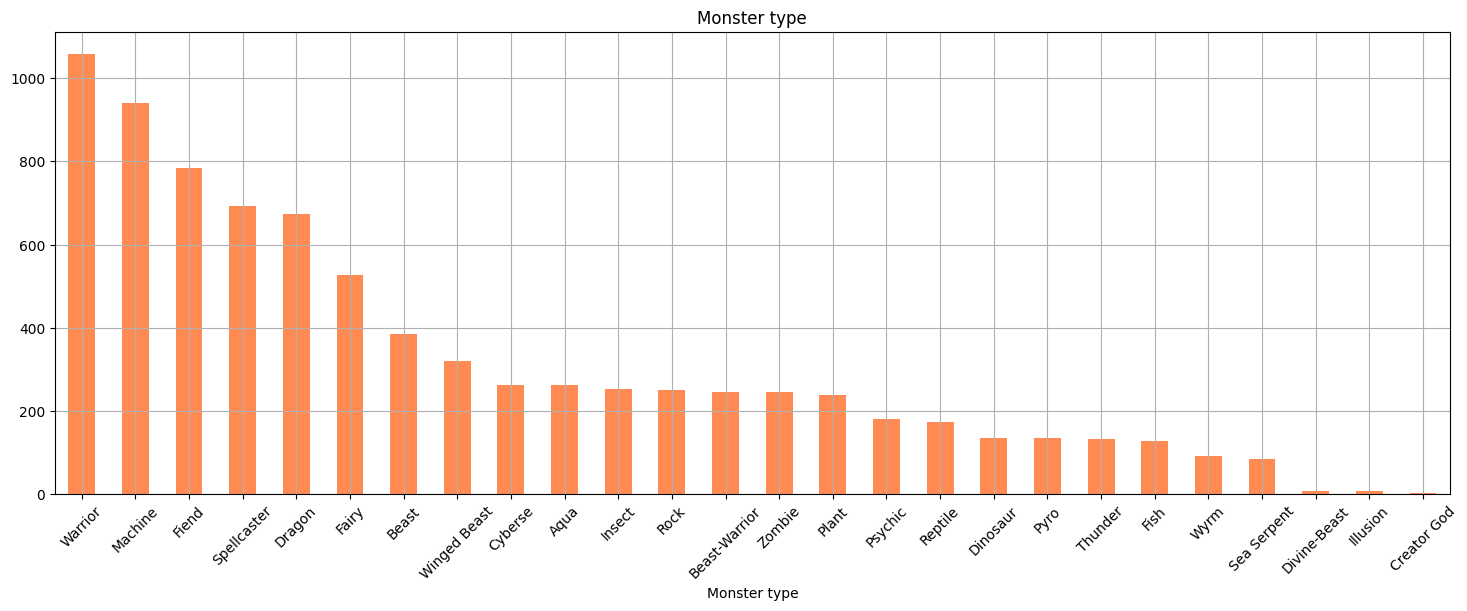

In [33]:
monster_type_colors = colors_dict["Monster Card"]
monster_df["Monster type"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=45, color=monster_type_colors, title="Monster type"
)
plt.show()

#### By Attribute

In [34]:
monster_crosstab = pd.crosstab(cards_df["Monster type"], cards_df["Attribute"])
monster_crosstab

Attribute      DARK  DIVINE  EARTH  FIRE  LIGHT  WATER  WIND
Monster type                                                
Aqua              9       0      7    10      6    222     7
Beast            38       0    213    17     74     15    27
Beast-Warrior    40       0     84    54     34     16    16
Creator God       0       1      0     0      0      0     0
Cyberse          73       0     36    49     62     28    13
Dinosaur         13       0     64    36      5      9     8
Divine-Beast      0       8      0     0      0      0     0
Dragon          261       0     48    51    173     28   113
Fairy            61       0     64    18    331     27    25
Fiend           590       0     34    48     71     25    17
Fish              2       0      2     0      1    121     2
Illusion          2       0      1     1      1      0     1
Insect           41       0    134     6     21      4    47
Machine         232       0    319    53    170     51   115
Plant            43       0    123    11     23     24    13
Psychic          23       0     38    17     47     13    43
Pyro              3       0      6   119      4      0     3
Reptile          39       0     34    16     46     35     4
Rock             17       0    202     5     14      5     7
Sea Serpent       3       0      1     1      2     73     4
Spellcaster     286       0     54    30    198     63    63
Thunder          14       0     10     5     80      4    19
Warrior         207       0    366   115    253     54    64
Winged Beast    112       0      8    18     15     12   154
Wyrm             15       0     20    12     23     12     8
Zombie          160       0     38    26      7      9     4

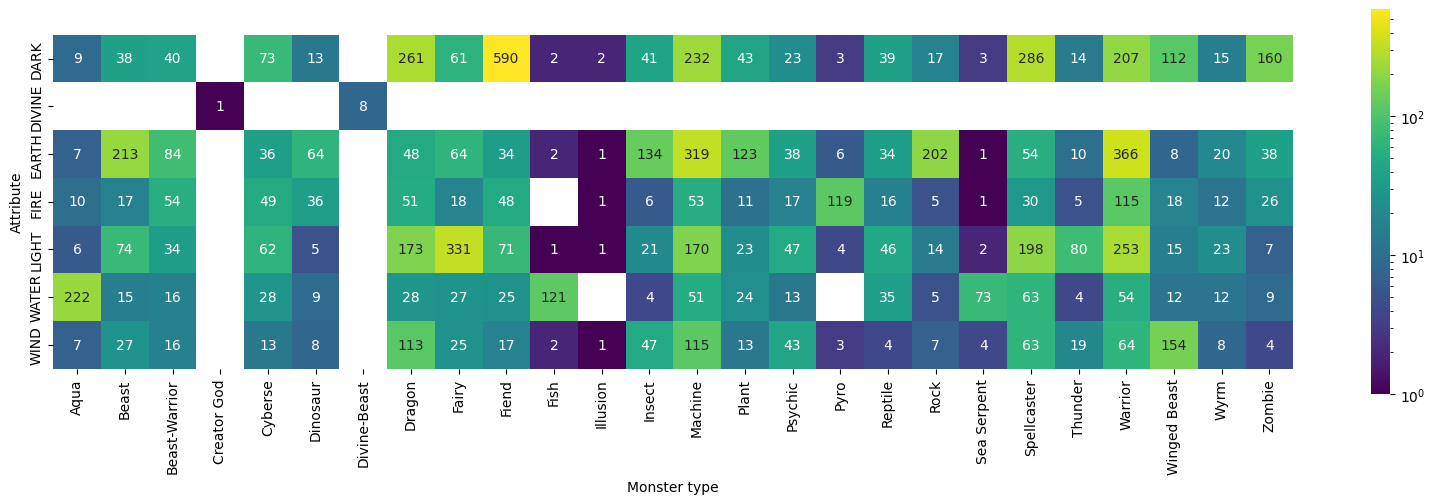

In [35]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    monster_crosstab[monster_crosstab > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

#### By primary type

In [36]:
monster_crosstab_b = pd.crosstab(
    cards_df["Monster type"], cards_df["Primary type"], dropna=False
)
monster_crosstab_b

Primary type   Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Monster type                                                                  
Aqua                      158              12             3              57   
Beast                     280              19             9              50   
Beast-Warrior             167              11             9              21   
Creator God                 1               0             0               0   
Cyberse                   129               5            99               5   
Dinosaur                   94               9             4              18   
Divine-Beast                5               0             0               0   
Dragon                    354              65            33              45   
Fairy                     377              22            25              32   
Fiend                     549              52            29              72   
Fish                       92               5             1              17   
Illusion                    5               1             0               0   
Insect                    187               4            10              29   
Machine                   654              49            40              61   
Plant                     166               6            15              24   
Psychic                   124              11             5               9   
Pyro                       94               9             2              18   
Reptile                   143               2             3              18   
Rock                      172              18             5              27   
Sea Serpent                56               2             2               8   
Spellcaster               523              27            28              54   
Thunder                    99               9             5              10   
Warrior                   691              97            32              79   
Winged Beast              231               9            10              26   
Wyrm                       57               2             9               3   
Zombie                    166               7             7              28   

Primary type   Ritual Monster  Synchro Monster  Xyz Monster  
Monster type                                                 
Aqua                        8                4           19  
Beast                       1               14           11  
Beast-Warrior               5                8           23  
Creator God                 0                0            0  
Cyberse                     7                6           10  
Dinosaur                    0                5            5  
Divine-Beast                0                0            0  
Dragon                     15              100           62  
Fairy                      18               19           33  
Fiend                      15               26           42  
Fish                        1                9            3  
Illusion                    0                0            0  
Insect                      1                8           14  
Machine                     4               66           66  
Plant                       0                8           18  
Psychic                     0               19           13  
Pyro                        0                6            6  
Reptile                     0                5            3  
Rock                        7                5           16  
Sea Serpent                 0                6           10  
Spellcaster                18               17           27  
Thunder                     0                7            2  
Warrior                    17               58           85  
Winged Beast                6               15           22  
Wyrm                        0               10            9  
Zombie                      6               18           12

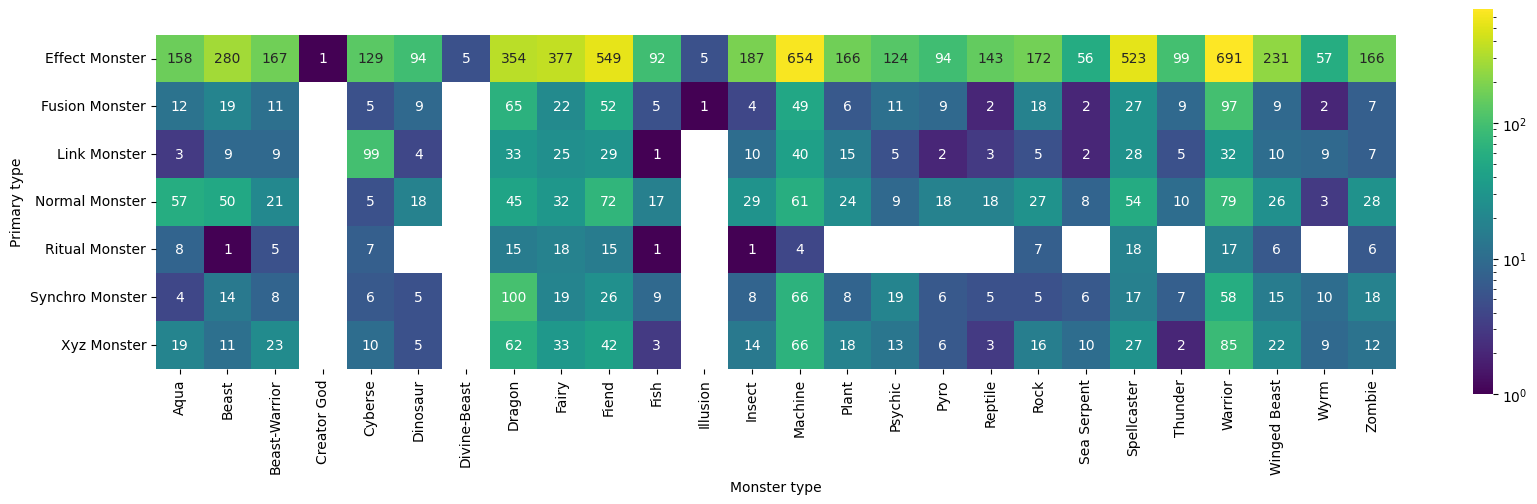

In [37]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    monster_crosstab_b[monster_crosstab_b > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

#### By secondary type

In [38]:
monster_crosstab_c = pd.crosstab(
    exploded_secondary_type["Monster type"],
    exploded_secondary_type["Secondary type"],
    dropna=False,
)
monster_crosstab_c

Secondary type  Flip monster  Gemini monster  Spirit monster  Toon monster  \
Monster type                                                                 
Aqua                       4               4               1             1   
Beast                     15               1               2             0   
Beast-Warrior              1               0               1             0   
Cyberse                    0               0               0             0   
Dinosaur                   0               0               0             0   
Dragon                     1               6               1             3   
Fairy                      8               2               8             0   
Fiend                     27               4               2             1   
Fish                       0               1               0             0   
Insect                    20               2               0             0   
Machine                   10               1               0             4   
Plant                      4               1               0             0   
Psychic                    3               0               0             0   
Pyro                       4               2               2             0   
Reptile                   18               1               0             0   
Rock                      12               1               2             0   
Sea Serpent                1               1               0             0   
Spellcaster               35               3               4             4   
Thunder                    3               1               1             0   
Warrior                   12               9               6             3   
Winged Beast               5               2               9             1   
Wyrm                       0               0               0             0   
Zombie                     4               3               2             0   

Secondary type  Tuner monster  Union monster  
Monster type                                  
Aqua                       11              3  
Beast                      22              0  
Beast-Warrior               9              0  
Cyberse                     9              0  
Dinosaur                    8              0  
Dragon                     46              4  
Fairy                      25              5  
Fiend                      45              1  
Fish                        8              0  
Insect                     12              0  
Machine                    87             18  
Plant                      20              1  
Psychic                    24              0  
Pyro                        9              1  
Reptile                     7              0  
Rock                        3              0  
Sea Serpent                 9              0  
Spellcaster                43              0  
Thunder                     9              0  
Warrior                    36              3  
Winged Beast               31              0  
Wyrm                       10              0  
Zombie                     23              1

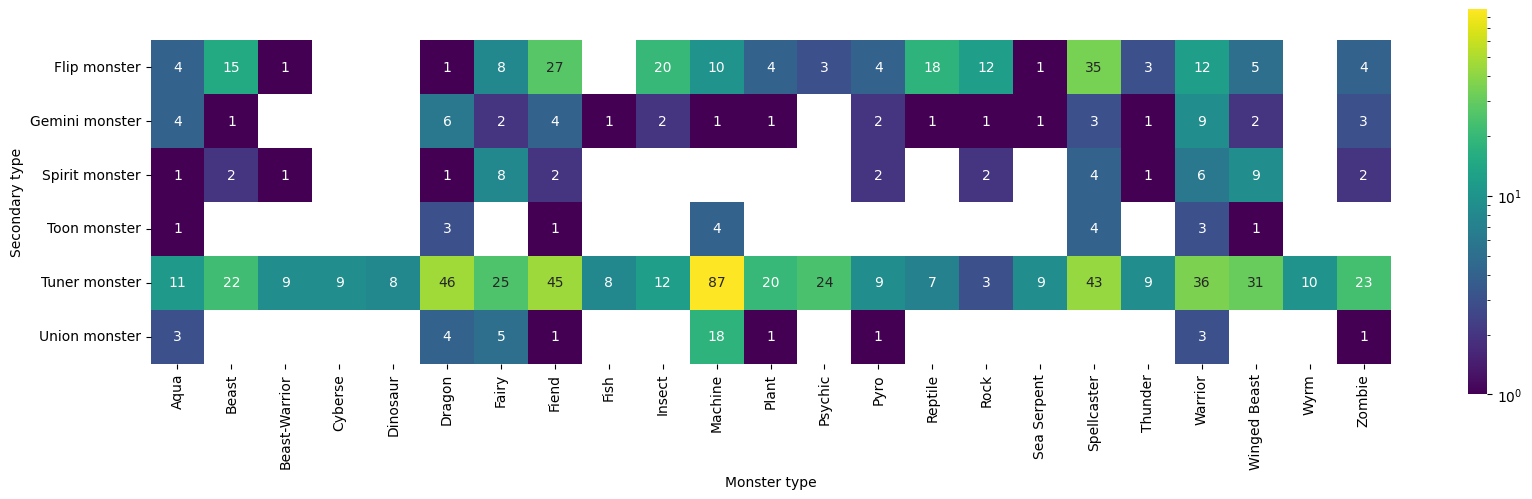

In [39]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    monster_crosstab_c[monster_crosstab_c > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

### Effect type

In [40]:
print("Total number of effect types:", monster_df["Effect type"].explode().nunique())

Total number of effect types:

14

In [41]:
monster_df[monster_df["Effect type"].notna()].drop(
    columns=["Card type", "Page name", "Page URL"]
).explode("Effect type").groupby("Effect type").nunique()

Name  Password  Archseries  Attribute  Primary type  \
Effect type                                                                   
Activation condition       1         1           1          1             1   
Condition               3285      3241         682          7             7   
Continuous Effect       2210      2203         578          7             6   
Continuous-like Effect   241       241          75          6             6   
Flip effect              143       142          40          6             1   
Ignition Effect         2703      2690         668          7             6   
Ignition-like Effect     230       224          82          6             6   
Lingering effect          21        21          14          6             3   
Maintenance cost          44        44           8          6             3   
Quick Effect            1085      1082         414          6             6   
Quick-like Effect          4         4           1          1             1   
Summoning condition      950       914         326          7             6   
Trigger Effect          4507      4494         811          7             7   
Unclassified effect      846       839         289          7             6   

                        Secondary type  Monster type  DEF  Pendulum Scale  \
Effect type                                                                 
Activation condition                 0             1    1               1   
Condition                            7            26   64              13   
Continuous Effect                    5            25   52              12   
Continuous-like Effect               4            21   36              13   
Flip effect                          2            18   31               1   
Ignition Effect                      7            25   61              12   
Ignition-like Effect                 3            20   34              13   
Lingering effect                     2            15   15               0   
Maintenance cost                     0            12   18               2   
Quick Effect                         5            24   50               9   
Quick-like Effect                    0             1    2               0   
Summoning condition                  4            25   52              10   
Trigger Effect                       7            25   63              14   
Unclassified effect                  5            26   46               9   

                        Link  Link Arrows  ATK  Level/Rank  TCG status  \
Effect type                                                              
Activation condition       0            0    1           1           1   
Condition                  6           54   66          14           5   
Continuous Effect          6           48   59          14           3   
Continuous-like Effect     1            2   42          11           3   
Flip effect                0            0   34          12           3   
Ignition Effect            5           42   67          13           4   
Ignition-like Effect       1            1   37          12           3   
Lingering effect           2            2   14           8           2   
Maintenance cost           1            1   21           8           1   
Quick Effect               6           29   51          13           4   
Quick-like Effect          0            0    3           1           1   
Summoning condition        5            8   53          13           4   
Trigger Effect             6           51   70          14           4   
Unclassified effect        5           12   50          13           4   

                        OCG status  Artwork  Modification date  Errata  
Effect type                                                             
Activation condition             1        0                  1       1  
Condition                        6        3               3280       4  
Continuous Effect                5        3      

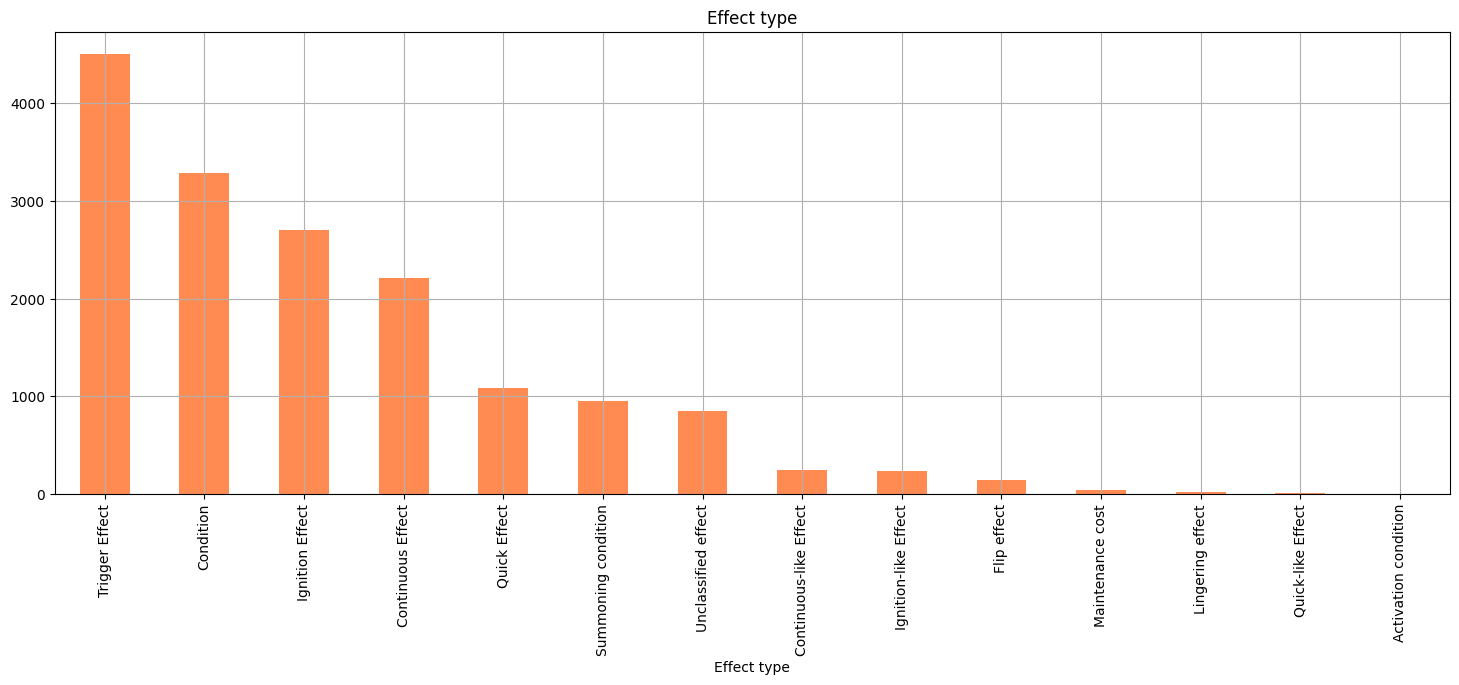

In [42]:
monster_effect_colors = colors_dict["Effect Monster"]
monster_df["Effect type"].explode("Effect type").value_counts().plot.bar(
    figsize=(18, 6), grid=True, color=monster_effect_colors, title="Effect type"
)
# plt.yscale('log')
plt.show()

### ATK

In [43]:
print("Total number of ATK values:", monster_df["ATK"].nunique())

Total number of ATK values:

84

In [44]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "ATK"
).nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
ATK                                                                         
0      613       612         236          6             7               7   
50       2         2           2          2             1               0   
100    221       221         110          6             5               3   
150      1         1           0          1             1               0   
200    122       122          69          6             6               5   
...    ...       ...         ...        ...           ...             ...   
5000    10         9           7          3             5               0   
?       80        76          37          7             5               1   
???      1         0           1          1             1               0   
????     1         0           1          1             0               0   
X000     1         0           1          1             0               0   

      Monster type  Effect type  DEF  Pendulum Scale  Link  Link Arrows  \
ATK                                                                       
0               23           95   35               9     5           15   
50               2            2    2               0     0            0   
100             20           48   27               9     2            2   
150              1            0    1               0     0            0   
200             20           36   22               5     1            2   
...            ...          ...  ...             ...   ...          ...   
5000             5            8    4               0     1            1   
?               20           35    8               2     1            1   
???              0            0    1               0     0            0   
????             1            0    1               0     0            0   
X000             1            0    1               0     0            0   

      Level/Rank  TCG status  OCG status  Artwork  Modification date  Errata  
ATK                                                                           
0             13           4           4        3                613       4  
50             1           1           1        0                  2       0  
100           11           3           3        2                221       4  
150            1           1           1        0                  1       0  
200            7           2           2        1                122       4  
...          ...         ...         ...      ...                ...     ...  
5000           3           1           2        1                 10       2  
?             13           2           2        3                 80       4  
???            1           0           1        0                  1       0  
????           1           1           1        0                  1       1  
X000           1           1           1        0                  1       1  

[84 rows x 18 columns]

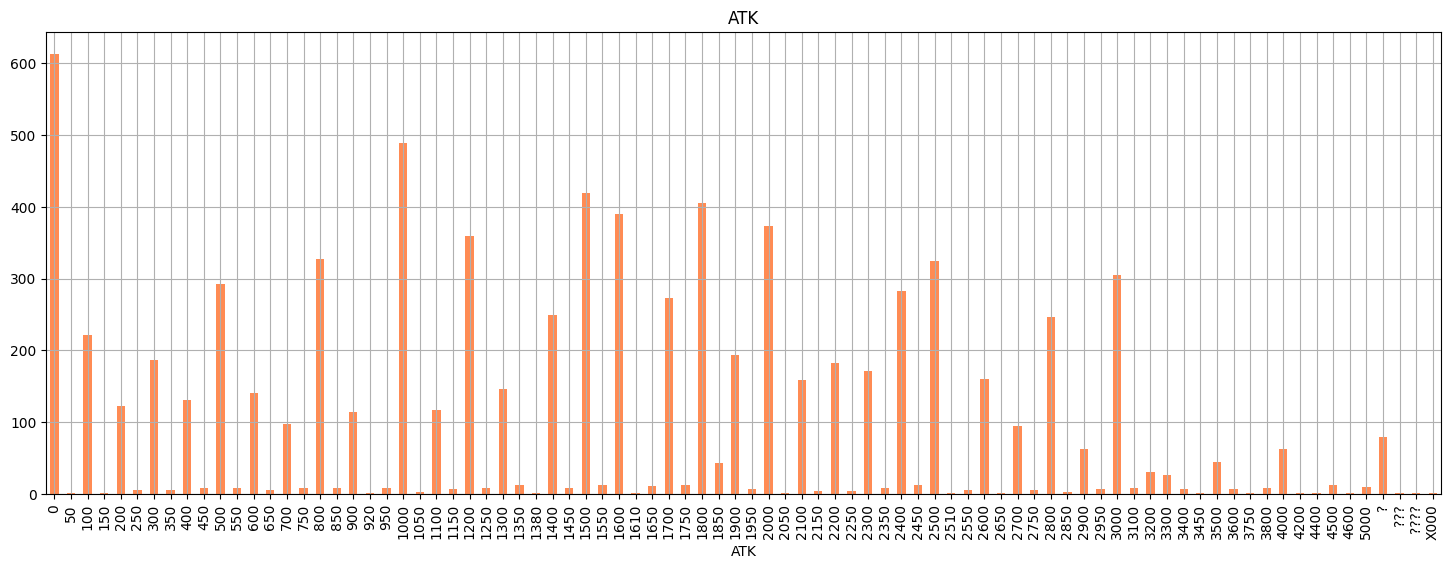

In [45]:
atk_colors = colors_dict["Monster Card"]
monster_df["ATK"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, color=atk_colors, title="ATK")
plt.show()

### DEF

In [46]:
print("Total number of DEF values:", monster_df["DEF"].nunique())

Total number of DEF values:

79

In [47]:
monster_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby(
    "DEF"
).nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

Name  Password  Archseries  Attribute  Primary type  Secondary type  \
DEF                                                                         
0      770       770         263          6             6               8   
50       1         1           1          1             1               0   
100    213       212          98          6             5               4   
200    258       257         112          6             5               5   
250      8         8           3          4             2               1   
...    ...       ...         ...        ...           ...             ...   
5000     6         5           4          3             2               0   
?       54        50          26          7             4               1   
???      1         0           1          1             1               0   
????     1         0           1          1             0               0   
X000     1         0           1          1             0               0   

      Monster type  Effect type  Pendulum Scale  Link  Link Arrows  ATK  \
DEF                                                                       
0               23          104              10     0            0   45   
50               1            1               0     0            0    1   
100             19           47               9     0            0   24   
200             23           48               5     0            0   31   
250              5            5               0     0            0    4   
...            ...          ...             ...   ...          ...  ...   
5000             4            5               0     0            0    2   
?               17           26               1     0            0    2   
???              0            0               0     0            0    1   
????             1            0               0     0            0    1   
X000             1            0               0     0            0    1   

      Level/Rank  TCG status  OCG status  Artwork  Modification date  Errata  
DEF                                                                           
0             13           3           3        2                769       4  
50             1           1           1        0                  1       0  
100           10           2           3        2                213       4  
200           10           2           4        2                258       4  
250            2           1           1        0                  8       2  
...          ...         ...         ...      ...                ...     ...  
5000           3           1           2        1                  6       2  
?             13           2           2        2                 54       4  
???            1           0           1        0                  1       0  
????           1           1           1        0                  1       1  
X000           1           1           1        0                  1       1  

[79 rows x 18 columns]

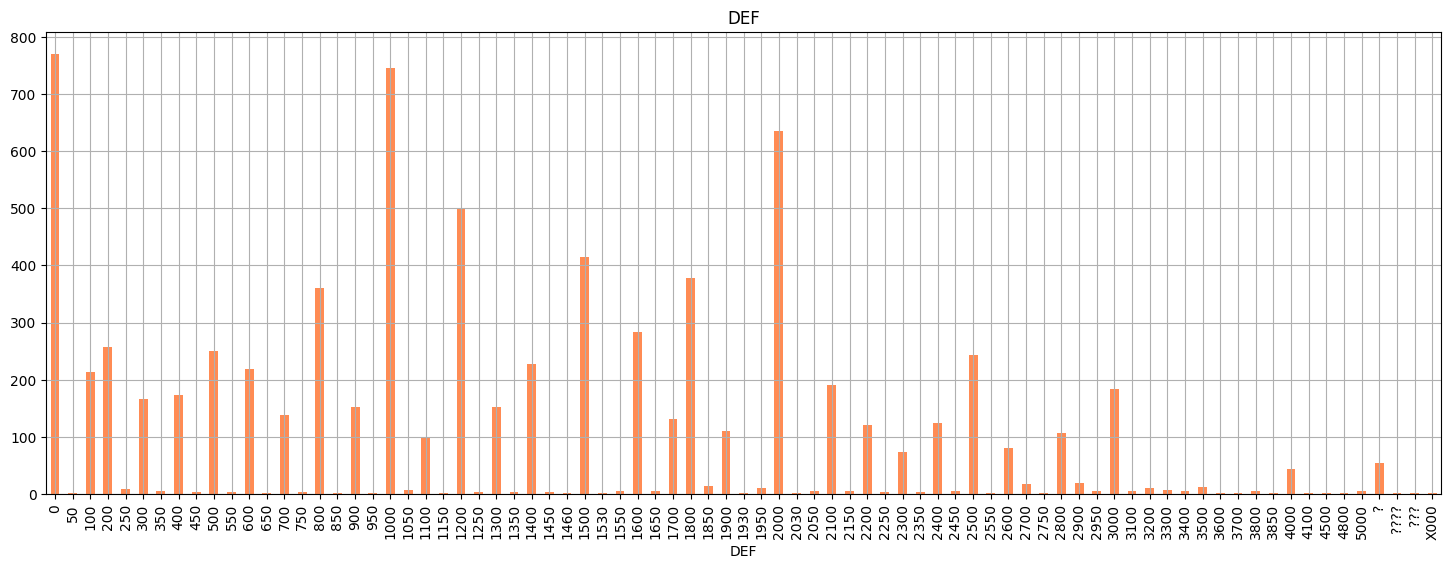

In [48]:
def_colors = colors_dict["Monster Card"]
monster_df["DEF"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, color=def_colors, title="DEF")
plt.show()

### Level/Rank

In [49]:
monster_df.drop(
    columns=["Card type", "Link", "Link Arrows", "Page name", "Page URL"]
).groupby("Level/Rank").nunique().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
)

Name  Password  Archseries  Attribute  Primary type  \
Level/Rank                                                        
0              6         6           3          2             2   
1            627       624         232          6             6   
2            684       683         213          6             6   
3           1167      1164         301          6             6   
4           2381      2379         522          6             6   
5            616       614         254          6             6   
6            631       628         243          6             6   
7            479       475         230          6             6   
8            710       693         315          6             6   
9            152       151          90          6             5   
10           261       250         154          7             5   
11            33        32          25          6             5   
12            65        64          45          7             5   
13             1         1           1          1             1   

            Secondary type  Monster type  Effect type  DEF  Pendulum Scale  \
Level/Rank                                                                   
0                        0             2            5    3               0   
1                        7            23           82   30              11   
2                        6            23           77   30               7   
3                        6            24           97   37               9   
4                        6            24          136   48               9   
5                        6            23           86   39               8   
6                        6            23           92   38               9   
7                        6            24          102   35               9   
8                        5            24          111   41               8   
9                        2            21           56   27               1   
10                       2            22           79   35               6   
11                       3            14           22   18               1   
12                       1            13           35   20               5   
13                       0             1            1    1               0   

            ATK  TCG status  OCG status  Artwork  Modification date  Errata  
Level/Rank                                                                   
0             3           2           2        0                  6       1  
1            22           3           4        2                626       4  
2            30           4           5        1                683       4  
3            41           3           5        3               1167       4  
4            55           4           6        3               2376       4  
5            46           3           4        2                616       4  
6            38           5           5        3                632       4  
7            38           5           4        2                480       4  
8            42           4           6        3                712       4  
9            33           4           3        1                152       4  
10           34           3           3        3                264       4  
11           16           2           2        1                 33       2  
12           15           1           2        1                 64       3  
13            1           1           1        0                  1       0

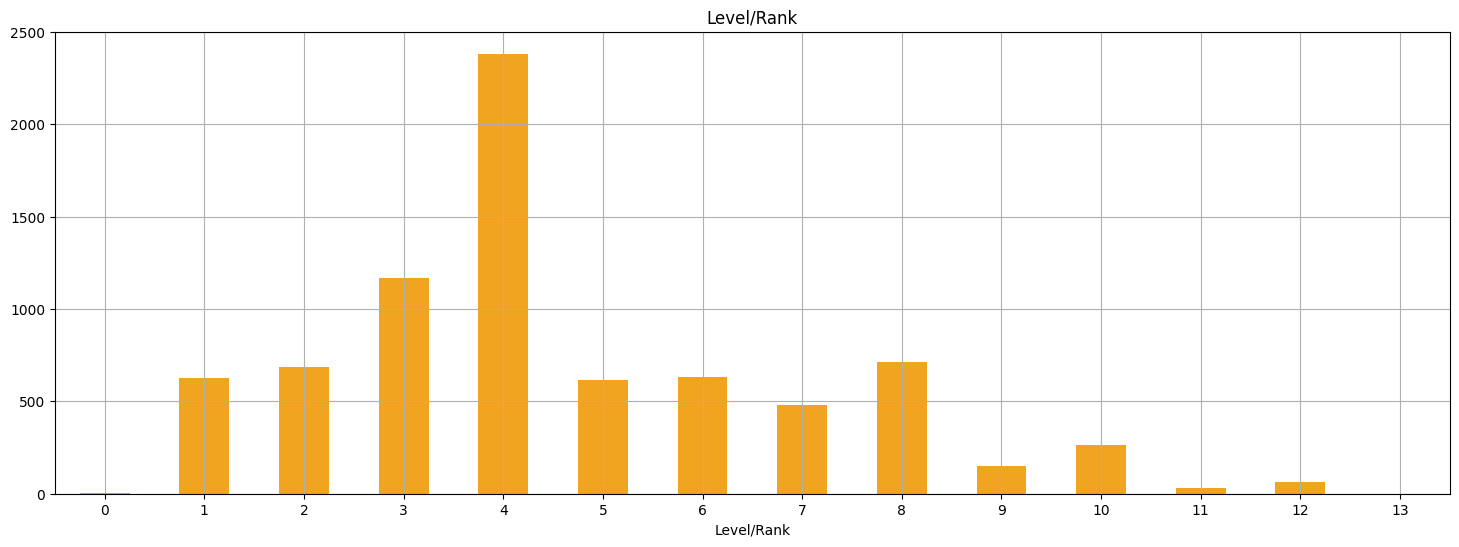

In [50]:
stars_colors = colors_dict["Level"]
monster_df["Level/Rank"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, rot=0, color=stars_colors, title="Level/Rank")
plt.show()

#### ATK statistics

In [51]:
monster_df[["Level/Rank", "ATK"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Level/Rank").describe()

ATK                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   600.000000  1341.640786  0.0     0.0     0.0     0.0   
1            618.0   248.300971   352.338141  0.0     0.0   100.0   300.0   
2            682.0   583.651026   409.550466  0.0   300.0   500.0   800.0   
3           1164.0   957.603093   487.879942  0.0   600.0  1000.0  1300.0   
4           2368.0  1418.931588   541.073350  0.0  1200.0  1500.0  1800.0   
5            613.0  1762.267537   639.598971  0.0  1500.0  1900.0  2200.0   
6            628.0  2016.321656   610.409702  0.0  1900.0  2200.0  2400.0   
7            476.0  2289.390756   614.309922  0.0  2200.0  2500.0  2600.0   
8            702.0  2548.005698   702.011790  0.0  2500.0  2800.0  3000.0   
9            149.0  2582.885906   850.730446  0.0  2500.0  2800.0  3000.0   
10           241.0  2794.813278  1205.363045  0.0  2700.0  3000.0  3500.0   
11            33.0  3066.666667  1100.544373  0.0  3000.0  3400.0  3500.0   
12            60.0  3252.500000  1406.505015  0.0  2975.0  3800.0  4000.0   

                    
               max  
Level/Rank          
0           3000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           4000.0  
6           4000.0  
7           3300.0  
8           4500.0  
9           4500.0  
10          5000.0  
11          5000.0  
12          5000.0

#### DEF statistics

In [52]:
monster_df[["Level/Rank", "DEF"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Level/Rank").describe()

DEF                                                         \
             count         mean          std  min     25%     50%     75%   
Level/Rank                                                                  
0              5.0   400.000000   894.427191  0.0     0.0     0.0     0.0   
1            620.0   355.967742   534.863562  0.0     0.0   100.0   400.0   
2            683.0   671.815520   562.331694  0.0   200.0   500.0   900.0   
3           1164.0   958.891753   575.294213  0.0   600.0   900.0  1300.0   
4           2370.0  1167.902954   610.576293  0.0   800.0  1200.0  1600.0   
5            614.0  1433.469055   672.709104  0.0  1000.0  1500.0  1900.0   
6            628.0  1548.535032   709.183384  0.0  1200.0  1600.0  2000.0   
7            478.0  1889.330544   650.109789  0.0  1600.0  2000.0  2300.0   
8            709.0  1976.516220   842.532414  0.0  1600.0  2100.0  2500.0   
9            149.0  2264.093960   825.646359  0.0  2000.0  2500.0  2900.0   
10           250.0  2227.000000  1266.593081  0.0  1800.0  2500.0  3000.0   
11            33.0  2756.060606  1187.681406  0.0  2500.0  3000.0  3400.0   
12            61.0  2875.409836  1568.827135  0.0  2000.0  3200.0  4000.0   

                    
               max  
Level/Rank          
0           2000.0  
1           2500.0  
2           2400.0  
3           3000.0  
4           3000.0  
5           3000.0  
6           3000.0  
7           3300.0  
8           4000.0  
9           3700.0  
10          5000.0  
11          5000.0  
12          5000.0

### Pendulum scale

In [53]:
monster_df.drop(
    columns=["Card type", "Link", "Link Arrows", "Page name", "Page URL"]
).groupby("Pendulum Scale").nunique().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
)

Name  Password  Archseries  Attribute  Primary type  \
Pendulum Scale                                                        
0                 12        12           9          5             2   
1                 71        68          41          6             5   
2                 36        36          15          6             2   
3                 37        37          17          6             3   
4                 33        33          17          5             5   
5                 34        34          16          6             2   
6                 15        15           9          4             1   
7                 27        27          16          6             2   
8                 45        45          25          6             5   
9                  8         8           3          3             2   
10                15        12           8          6             5   
11                 1         1           0          1             1   
12                 3         3           3          2             2   
13                 2         2           2          2             2   

                Secondary type  Monster type  Effect type  DEF  ATK  \
Pendulum Scale                                                        
0                            1             9           10    7    6   
1                            2            10           39   27   28   
2                            1            11           21   22   17   
3                            1            16           24   15   23   
4                            0             8           25   16   18   
5                            1            12           20   21   23   
6                            1             7           11   11   11   
7                            1            14           14   17   19   
8                            1             9           24   19   19   
9                            1             3            5    2    3   
10                           0             6           11    8    6   
11                           0             1            1    1    1   
12                           0             3            3    3    3   
13                           0             2            2    2    2   

                Level/Rank  TCG status  OCG status  Artwork  \
Pendulum Scale                                                
0                        7           1           1        1   
1                       11           3           3        1   
2                        6           2           2        1   
3                        8           1           1        0   
4                        8           1           1        2   
5                        7           3           3        0   
6                        6           1           1        0   
7                        6           1           1        1   
8                        8           1           2        0   
9                        5           1           1        0   
10                       6           2           2        0   
11                       1           1           0        0   
12                       2           1           1        0   
13                       2           1           1        0   

                Modification date  Errata  
Pendulum Scale                             
0                              12       1  
1                              71       3  
2                              36       2  
3                              37       1  
4                              33       2  
5                              34       2  
6                              15       1  
7                              27       3  
8                              45       2  
9                               8       0  
10                             15       0  
11                              1       0  
12                              3       0  
13                              2       0

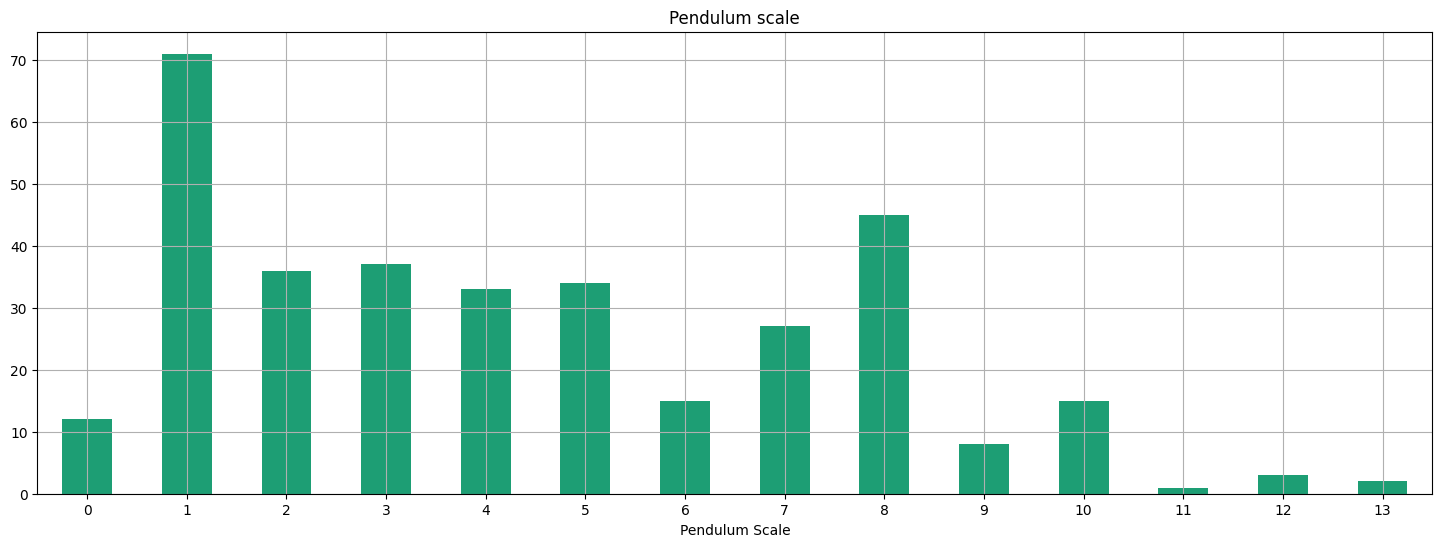

In [54]:
scales_colors = colors_dict["Pendulum Monster"]
monster_df["Pendulum Scale"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(
    figsize=(18, 6), grid=True, rot=0, color=scales_colors, title="Pendulum scale"
)
plt.show()

#### ATK statistics

In [55]:
monster_df[["Pendulum Scale", "ATK"]].apply(
    pd.to_numeric, errors="coerce"
).dropna().astype(int).groupby("Pendulum Scale").describe()

ATK                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               12.0  1175.000000  1294.130104     0.0     0.0   650.0   
1               70.0  1751.428571  1031.214685     0.0  1000.0  1800.0   
2               36.0  1423.611111   688.734462   100.0   800.0  1500.0   
3               37.0  1463.513514   848.417534     0.0   600.0  1750.0   
4               33.0  1824.242424  1017.972956     0.0  1200.0  2000.0   
5               34.0  1339.705882   808.831875     0.0   850.0  1325.0   
6               15.0  1320.000000   707.308783   100.0   950.0  1500.0   
7               27.0  1279.629630   787.920737     0.0   700.0  1400.0   
8               45.0  1200.000000   927.606892     0.0   300.0  1200.0   
9                8.0  2150.000000   730.948503  1000.0  2050.0  2400.0   
10              15.0  1766.666667  1369.914839     0.0   250.0  2500.0   
11               1.0   100.000000          NaN   100.0   100.0   100.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               2.0  2000.000000  2828.427125     0.0  1000.0  2000.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  3000.0  
1               2500.0  4000.0  
2               2000.0  2500.0  
3               2100.0  2600.0  
4               2700.0  3000.0  
5               1800.0  3450.0  
6               1800.0  2400.0  
7               1750.0  3000.0  
8               1800.0  3300.0  
9               2500.0  2800.0  
10              2950.0  3000.0  
11               100.0   100.0  
12              2275.0  3000.0  
13              3000.0  4000.0

#### DEF statistics

In [56]:
monster_df[["Pendulum Scale", "DEF"]].apply(
    pd.to_numeric, errors="coerce"
).dropna().astype(int).groupby("Pendulum Scale").describe()

DEF                                                    \
               count         mean          std     min     25%     50%   
Pendulum Scale                                                           
0               12.0  1391.666667  1422.199534     0.0     0.0   850.0   
1               71.0  1638.028169   962.491736     0.0  1000.0  1800.0   
2               36.0  1338.888889   728.316171     0.0   875.0  1200.0   
3               37.0  1144.594595   787.910720     0.0   500.0  1200.0   
4               33.0  1563.636364   834.347867     0.0  1000.0  1600.0   
5               34.0  1136.764706   822.625953     0.0   550.0  1000.0   
6               15.0  1226.666667   711.604492   400.0   600.0  1100.0   
7               27.0  1312.962963   830.383669     0.0   700.0  1300.0   
8               45.0  1080.000000   758.467354     0.0   400.0  1000.0   
9                8.0  1225.000000   636.396103  1000.0  1000.0  1000.0   
10              15.0  1926.666667  1123.430122     0.0  1000.0  2500.0   
11               1.0   100.000000          NaN   100.0   100.0   100.0   
12               2.0  1550.000000  2050.609665   100.0   825.0  1550.0   
13               2.0  2000.000000  2828.427125     0.0  1000.0  2000.0   

                                
                   75%     max  
Pendulum Scale                  
0               2500.0  4000.0  
1               2400.0  4000.0  
2               1825.0  2700.0  
3               1800.0  3000.0  
4               2300.0  2800.0  
5               1575.0  3000.0  
6               1700.0  2600.0  
7               2000.0  2700.0  
8               1700.0  2700.0  
9               1000.0  2800.0  
10              2700.0  3000.0  
11               100.0   100.0  
12              2275.0  3000.0  
13              3000.0  4000.0

#### Level/Rank statistics

In [57]:
monster_df[["Pendulum Scale", "Level/Rank"]].apply(
    pd.to_numeric, errors="coerce"
).dropna().astype(int).groupby("Pendulum Scale").describe()

Level/Rank                                                  
                    count      mean       std  min   25%   50%    75%   max
Pendulum Scale                                                             
0                    12.0  6.166667  3.833663  1.0  2.50   7.0   8.50  12.0
1                    71.0  6.056338  2.395754  1.0  4.00   6.0   8.00  12.0
2                    36.0  4.416667  1.380993  1.0  3.75   4.0   5.00   7.0
3                    37.0  4.432432  1.708484  1.0  4.00   4.0   5.00  10.0
4                    33.0  5.606061  2.135114  1.0  4.00   6.0   7.00   8.0
5                    34.0  4.176471  1.961301  1.0  3.00   4.0   4.00  11.0
6                    15.0  3.933333  1.579632  1.0  3.00   4.0   4.50   8.0
7                    27.0  4.185185  1.641693  2.0  3.00   4.0   5.00  10.0
8                    45.0  3.800000  2.272364  1.0  2.00   4.0   4.00  10.0
9                     8.0  5.625000  1.302470  4.0  5.00   5.0   6.25   8.0
10                   15.0  7.066667  3.034720  1.0  7.00   7.0   9.00  12.0
11                    1.0  1.000000       NaN  1.0  1.00   1.0   1.00   1.0
12                    3.0  8.333333  6.350853  1.0  6.50  12.0  12.00  12.0
13                    2.0  9.500000  3.535534  7.0  8.25   9.5  10.75  12.0

### Link

In [58]:
monster_df.drop(
    columns=[
        "Card type",
        "Primary type",
        "Secondary type",
        "Level/Rank",
        "DEF",
        "Pendulum Scale",
        "Page name",
        "Page URL",
    ]
).groupby("Link").nunique().sort_index(key=lambda x: pd.to_numeric(x, errors="coerce"))

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link                                                                     
1       51        51          27          6            12           18   
2      191       190         105          6            23           32   
3       86        86          50          6            16           25   
4       46        43          25          6            16           21   
5        9         6           5          2             5            6   
6        2         2           2          1             1            2   

      Link Arrows  ATK  TCG status  OCG status  Artwork  Modification date  \
Link                                                                         
1               8   11           3           3        1                 51   
2              19   24           2           4        3                191   
3              17   18           2           2        2                 86   
4              13   12           3           3        3                 46   
5               3    4           2           2        0                  9   
6               2    2           1           1        0                  2   

      Errata  
Link          
1          1  
2          3  
3          2  
4          1  
5          0  
6          0

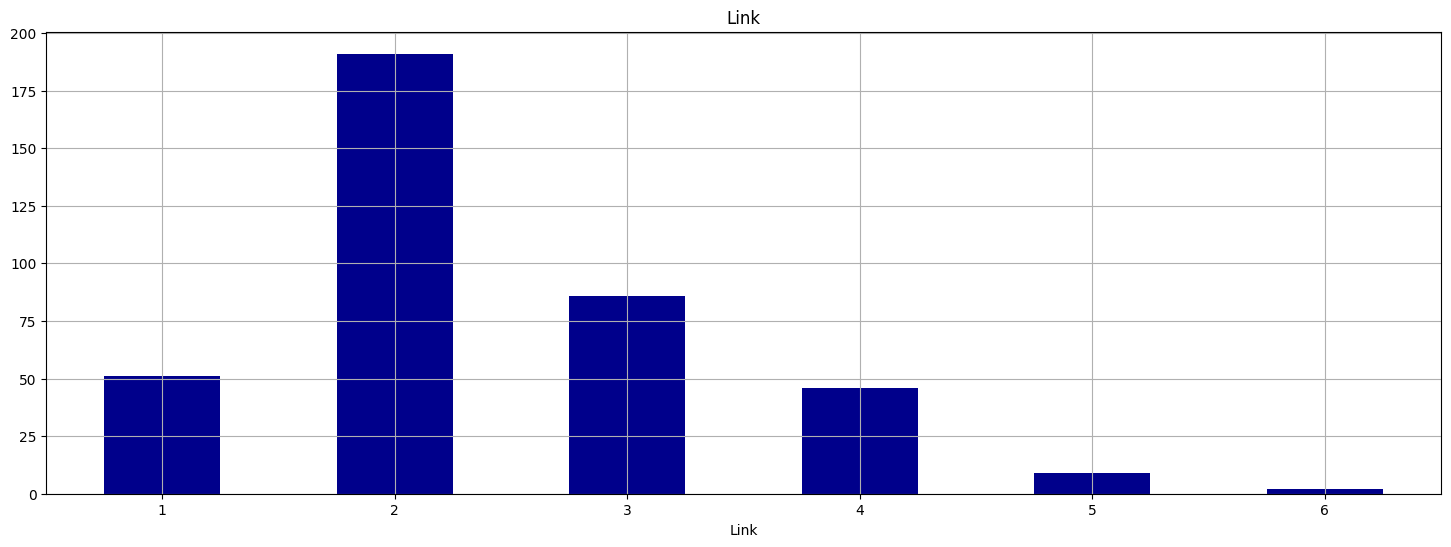

In [59]:
link_colors = colors_dict["Link Monster"]
monster_df["Link"].value_counts().sort_index(
    key=lambda x: pd.to_numeric(x, errors="coerce")
).plot.bar(figsize=(18, 6), grid=True, rot=0, color=link_colors, title="Link")
plt.show()

#### ATK statistics

In [60]:
monster_df[["Link", "ATK"]].apply(pd.to_numeric, errors="coerce").dropna().astype(
    int
).groupby("Link").describe()

ATK                                                                  
      count         mean          std     min     25%     50%     75%     max
Link                                                                         
1      51.0   758.823529   575.561107     0.0   300.0   800.0  1000.0  3000.0
2     191.0  1414.921466   508.273516     0.0  1100.0  1500.0  1800.0  2300.0
3      86.0  2264.534884   649.110988     0.0  2200.0  2400.0  2500.0  4000.0
4      45.0  2671.111111   641.242481     0.0  2500.0  2800.0  3000.0  3300.0
5       9.0  3277.777778   712.000312  2500.0  3000.0  3000.0  3500.0  5000.0
6       2.0  1750.000000  2474.873734     0.0   875.0  1750.0  2625.0  3500.0

### Link Arrows

#### By combination

In [61]:
print("Total number of link arrow combinations:", monster_df["Link Arrows"].nunique())

Total number of link arrow combinations:

62

In [62]:
monster_df.drop(
    columns=[
        "Card type",
        "Primary type",
        "Level/Rank",
        "Pendulum Scale",
        "Link",
        "Secondary type",
        "DEF",
        "Page name",
        "Page URL",
    ]
).groupby("Link Arrows").nunique()

Name  Password  Archseries  Attribute  Monster type  \
Link Arrows                                                         
(←,)             5         5           4          2             3   
(←, ↑)           4         4           2          2             3   
(←, →)          19        19           9          6             9   
(←, →, ↑)        9         9           6          4             6   
(↑,)            10        10           5          5             5   
...            ...       ...         ...        ...           ...   
(↙, ↘, ←, ↖)     1         1           1          1             1   
(↙, ↘, ↑)       22        22          15          6            11   
(↙, ↘, →)        2         2           2          2             2   
(↙, ↘, ↖)        2         2           0          2             2   
(↙, ↘, ↖, ↗)     1         1           1          1             1   

              Effect type  ATK  TCG status  OCG status  Artwork  \
Link Arrows                                                       
(←,)                    4    2           3           2        0   
(←, ↑)                  3    4           1           1        0   
(←, →)                  8   11           2           2        1   
(←, →, ↑)               7    7           1           1        0   
(↑,)                    9    6           1           1        0   
...                   ...  ...         ...         ...      ...   
(↙, ↘, ←, ↖)            1    1           1           1        0   
(↙, ↘, ↑)              11   11           2           2        2   
(↙, ↘, →)               2    2           1           1        0   
(↙, ↘, ↖)               2    2           1           1        0   
(↙, ↘, ↖, ↗)            1    1           1           1        0   

              Modification date  Errata  
Link Arrows                              
(←,)                          5       0  
(←, ↑)                        4       0  
(←, →)                       19       0  
(←, →, ↑)                     9       0  
(↑,)                         10       0  
...                         ...     ...  
(↙, ↘, ←, ↖)                  1       0  
(↙, ↘, ↑)                    22       2  
(↙, ↘, →)                     2       0  
(↙, ↘, ↖)                     2       0  
(↙, ↘, ↖, ↗)                  1       1  

[62 rows x 12 columns]

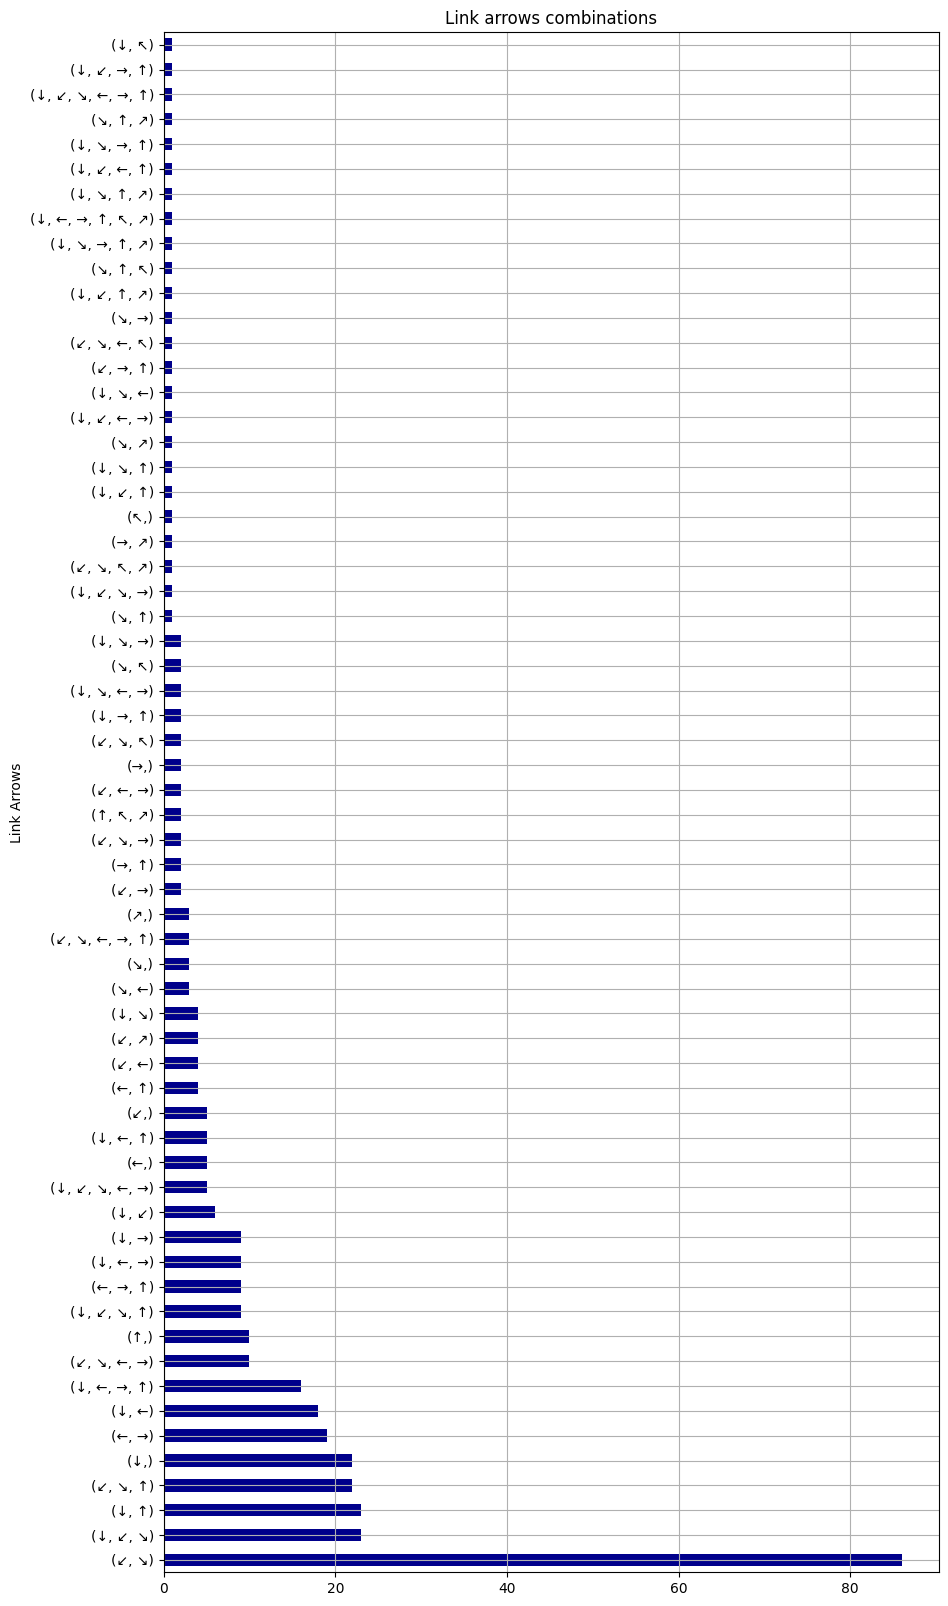

In [63]:
arrows_colors = colors_dict["Link Monster"]
monster_df["Link Arrows"].value_counts().plot.barh(
    figsize=(10, 20), grid=True, color=arrows_colors, title="Link arrows combinations"
)
plt.show()

#### By unique

In [64]:
monster_df[monster_df["Link Arrows"].notna()].drop(
    columns=[
        "Card type",
        "Primary type",
        "Level/Rank",
        "Pendulum Scale",
        "Secondary type",
        "DEF",
        "Page name",
        "Page URL",
    ]
).explode("Link Arrows").groupby("Link Arrows").nunique()

Name  Password  Archseries  Attribute  Monster type  Effect type  \
Link Arrows                                                                     
←             120       114          49          6            21           35   
↑             121       118          47          6            20           31   
→             106       100          42          6            20           30   
↓             169       163          73          6            20           42   
↖              12        12           6          5             5            7   
↗              17        17           8          5             7            8   
↘             192       188         104          6            22           36   
↙             195       191         105          6            22           37   

             Link  ATK  TCG status  OCG status  Artwork  Modification date  \
Link Arrows                                                                  
←               6   29           4           3        3                120   
↑               6   27           3           3        3                121   
→               6   27           3           3        2                106   
↓               6   32           3           4        3                169   
↖               5   10           1           1        2                 12   
↗               6   11           1           1        2                 17   
↘               6   33           3           5        3                192   
↙               6   34           3           5        3                195   

             Errata  
Link Arrows          
←                 1  
↑                 2  
→                 1  
↓                 1  
↖                 1  
↗                 1  
↘                 3  
↙                 3

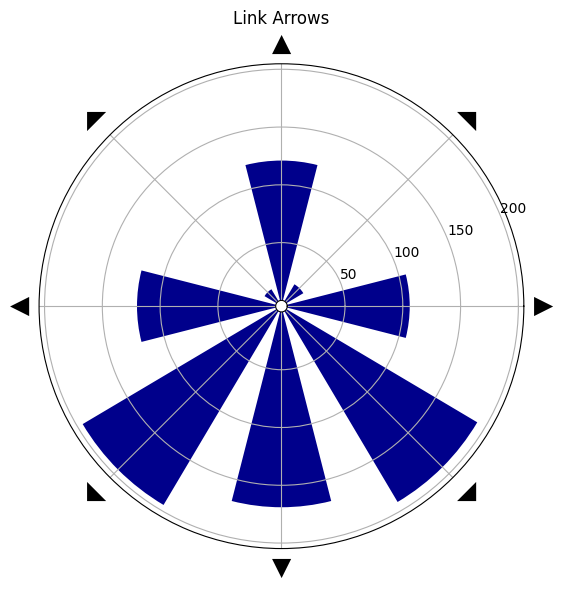

In [65]:
arrow_plot(monster_df["Link Arrows"].explode("Link Arrows"))

#### By link

In [66]:
arrow_per_link = monster_df[["Link Arrows", "Link"]].explode("Link Arrows").dropna()
arrow_crosstab = pd.crosstab(arrow_per_link["Link Arrows"], arrow_per_link["Link"])
arrow_crosstab

Link          1    2   3   4  5  6
Link Arrows                       
←             5   48  26  31  8  2
↑            10   30  45  30  4  2
→             2   34  27  32  9  2
↓            22   61  44  34  6  2
↖             1    3   5   2  0  1
↗             3    6   3   3  1  1
↘             3   98  55  26  9  1
↙             5  102  53  26  8  1

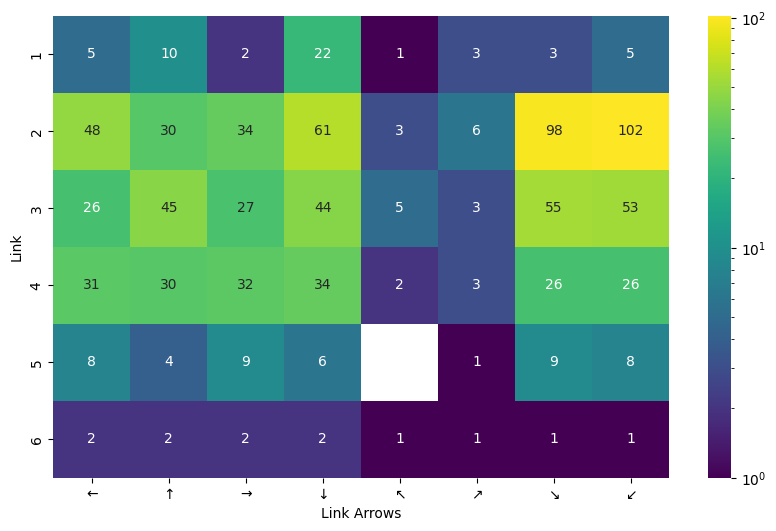

In [67]:
plt.figure(figsize=(10, 6))
sns.heatmap(
    arrow_crosstab[arrow_crosstab > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

## Spell & Trap

### Properties

In [68]:
print("Total number of properties:", st_df["Property"].nunique())

Total number of properties:

9

In [69]:
st_df.drop(columns=["Card type", "Page name", "Page URL"]).groupby("Property").nunique()

Name  Password  Archseries  Effect type  TCG status  \
Property                                                                     
Continuous Spell Card   435       433         168           56           4   
Continuous Trap Card    509       500         169           65           4   
Counter Trap Card       161       159          64           19           2   
Equip Spell Card        267       267          76           38           2   
Field Spell Card        286       282         151           36           5   
Normal Spell Card       950       949         241           44           4   
Normal Trap Card       1203      1200         252           48           5   
Quick-Play Spell Card   455       450         147           33           3   
Ritual Spell Card        77        77          26            8           1   

                       OCG status  Artwork  Modification date  Errata  
Property                                                               
Continuous Spell Card           5        2                435       4  
Continuous Trap Card            4        1                509       4  
Counter Trap Card               2        1                161       3  
Equip Spell Card                2        1                267       4  
Field Spell Card                5        1                287       4  
Normal Spell Card               6        3                951       4  
Normal Trap Card                5        2               1202       3  
Quick-Play Spell Card           4        1                453       4  
Ritual Spell Card               1        1                 76       3

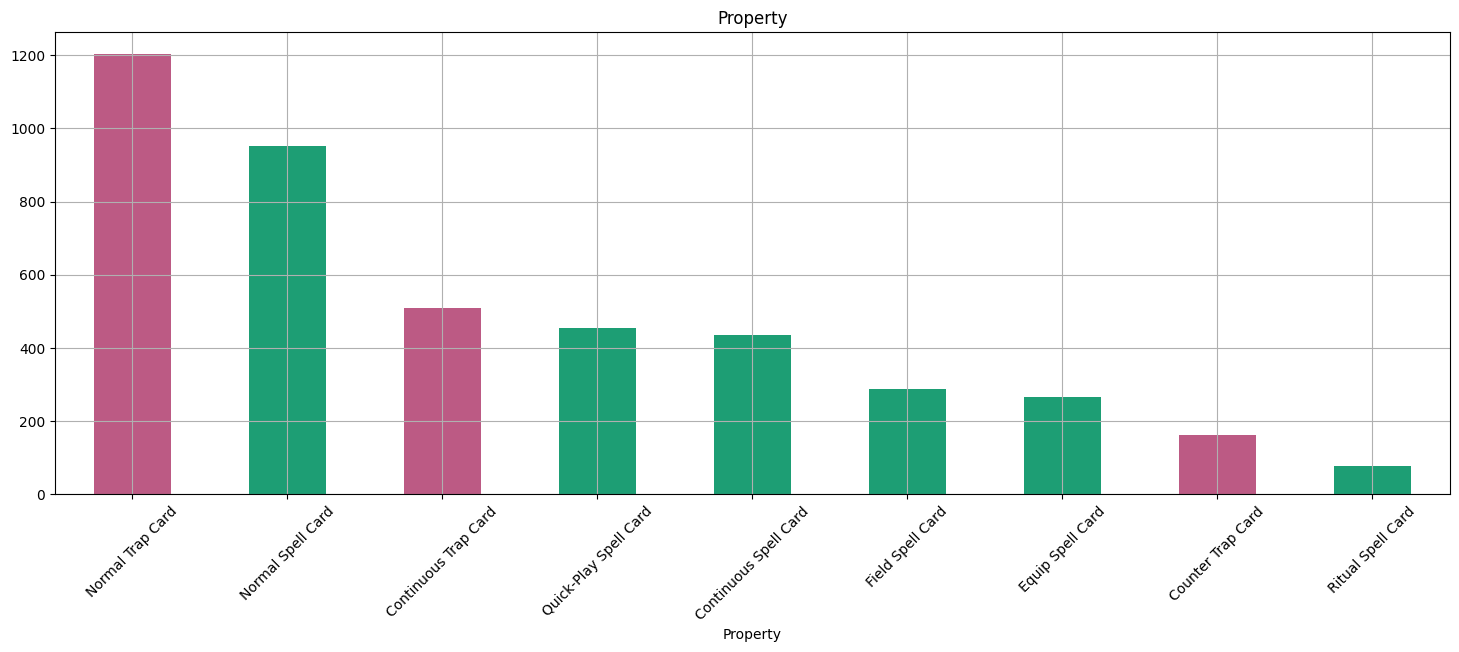

In [70]:
st_colors = [
    colors_dict[i]
    for i in cards_df[["Card type", "Property"]]
    .value_counts()
    .index.get_level_values(0)
]
st_df["Property"].value_counts().plot.bar(
    figsize=(18, 6), grid=True, rot=45, color=st_colors, title="Property"
)
plt.show()

### Effect type

In [71]:
print("Total number of effect types:", st_df["Effect type"].explode().nunique())

Total number of effect types:

14

In [72]:
st_df.explode("Effect type").groupby("Effect type").nunique()

Name  Password  Card type  Property  Archseries  \
Effect type                                                               
Activation condition     822       815          2         8         171   
Condition               1795      1778          2         9         401   
Continuous Effect         22        22          2         6          13   
Continuous-like Effect   925       915          2         7         247   
Cost                     444       442          2         7         115   
Effect                  3049      3031          2         9         456   
Ignition Effect            2         2          2         2           2   
Ignition-like Effect     480       478          1         6         200   
Lingering effect          96        96          2         6          42   
Maintenance cost          22        22          2         5           7   
Quick Effect              10        10          2         3           4   
Quick-like Effect        368       363          2         4         159   
Trigger Effect           876       870          2         9         273   
Unclassified effect       88        88          2         9          51   

                        TCG status  OCG status  Page name  Page URL  Artwork  \
Effect type                                                                    
Activation condition             5           5        822       822        2   
Condition                        6           5       1796      1796        2   
Continuous Effect                2           1         22        22        1   
Continuous-like Effect           5           5        926       926        2   
Cost                             4           4        444       444        2   
Effect                           6           6       3050      3050        3   
Ignition Effect                  1           1          2         2        0   
Ignition-like Effect             3           5        480       480        2   
Lingering effect                 3           3         96        96        1   
Maintenance cost                 2           2         22        22        1   
Quick Effect                     1           1         10        10        0   
Quick-like Effect                5           4        368       368        1   
Trigger Effect                   5           4        876       876        1   
Unclassified effect              2           2         88        88        1   

                        Modification date  Errata  
Effect type                                        
Activation condition                  821       4  
Condition                            1792       4  
Continuous Effect                      22       2  
Continuous-like Effect                925       4  
Cost                                  444       4  
Effect                               3040       4  
Ignition Effect                         2       1  
Ignition-like Effect                  479       3  
Lingering effect                       96       3  
Maintenance cost                       22       2  
Quick Effect                           10       2  
Quick-like Effect                     368       2  
Trigger Effect                        875       4  
Unclassified effect                    88       1

#### Spell & Trap discrimination

In [73]:
st_diff = (
    st_df[["Card type", "Effect type"]]
    .explode("Effect type")
    .value_counts()
    .unstack(0)
    .fillna(0)
    .astype(int)
)
st_diff

Card type               Spell Card  Trap Card
Effect type                                  
Activation condition           241        581
Condition                     1211        585
Continuous Effect                7         15
Continuous-like Effect         636        290
Cost                           235        209
Effect                        1598       1452
Ignition Effect                  1          1
Ignition-like Effect           480          0
Lingering effect                56         40
Maintenance cost                11         11
Quick Effect                     4          6
Quick-like Effect                3        365
Trigger Effect                 593        283
Unclassified effect             66         22

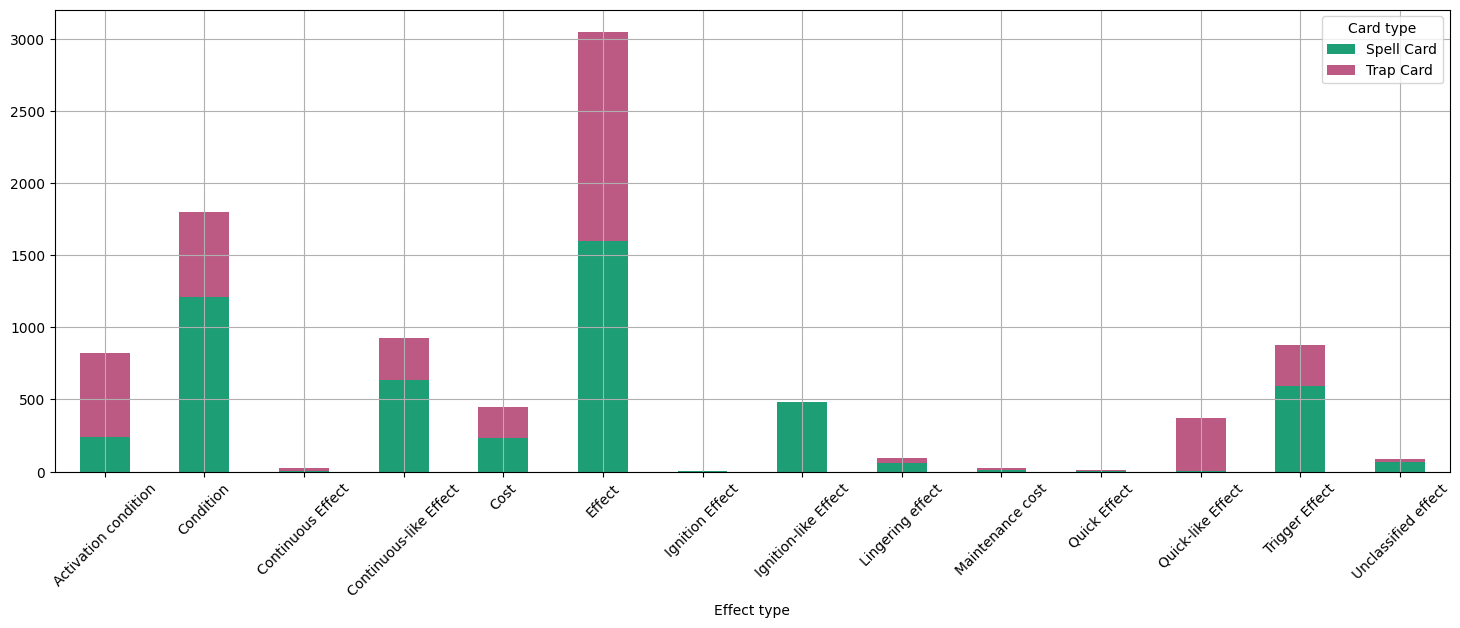

In [74]:
st_diff_colors = {
    "Spell Card": colors_dict["Spell Card"],
    "Trap Card": colors_dict["Trap Card"],
}
st_diff.plot.bar(figsize=(18, 6), stacked=True, grid=True, rot=45, color=st_diff_colors)
plt.show()

## Archseries

In [75]:
exploded_archseries = cards_df.explode("Archseries")
print("Total number of Archseries:", exploded_archseries["Archseries"].nunique())

Total number of Archseries:

739

In [76]:
exploded_archseries.groupby("Archseries").nunique()

Name  Password  Card type  Property  Effect type  \
Archseries                                                             
"C"                    9         9          1         0            7   
-Eyes Dragon          75        75          1         0           45   
/Assault Mode          7         7          1         0            5   
@Ignister             18        18          1         0            9   
A-to-Z                16        16          1         0            5   
...                  ...       ...        ...       ...          ...   
Zera                   9         9          2         1            7   
Zexal                 26        26          3         3           14   
Zombie counterpart    21        21          2         1           12   
Zoodiac               15        15          3         3            9   
Zubaba                 5         5          1         0            3   

                    TCG status  OCG status  Page name  Page URL  Artwork  \
Archseries                                                                 
"C"                          2           1          9         9        0   
-Eyes Dragon                 2           2         75        75        1   
/Assault Mode                1           1          7         7        0   
@Ignister                    1           1         18        18        0   
A-to-Z                       1           1         16        16        2   
...                        ...         ...        ...       ...      ...   
Zera                         1           1         10        10        0   
Zexal                        2           2         26        26        0   
Zombie counterpart           1           1         21        21        0   
Zoodiac                      3           3         15        15        1   
Zubaba                       1           1          5         5        0   

                    Modification date  Errata  Attribute  Primary type  \
Archseries                                                               
"C"                                 9       2          1             2   
-Eyes Dragon                       75       4          6             7   
/Assault Mode                       7       1          5             1   
@Ignister                          18       0          6             6   
A-to-Z                             16       3          1             3   
...                               ...     ...        ...           ...   
Zera                               10       2          3             4   
Zexal                              26       1          5             2   
Zombie counterpart                 21       2          5             3   
Zoodiac                            15       1          1             2   
Zubaba                              5       1          2             2   

                    Secondary type  Monster type  DEF  Pendulum Scale  Link  \
Archseries                                                                    
"C"                              0             1    8               0     0   
-Eyes Dragon                     2             3   14               7     1   
/Assault Mode                    0             6    6               0     0   
@Ignister                        1             1    9               0     3   
A-to-Z                           1             1   12               0     0   
...                            ...           ...  ...             ...   ...   
Zera                             0             4    3               0     0   
Zexal                            0             7   13               0     0   
Zombie counterpart               4             1    9               0     0   
Zoodiac                          0             1    6               0     0   
Zubaba                           0             1    5               0     0   

                    Link Arrows  ATK  Level/Rank  
Archseries                                        
"

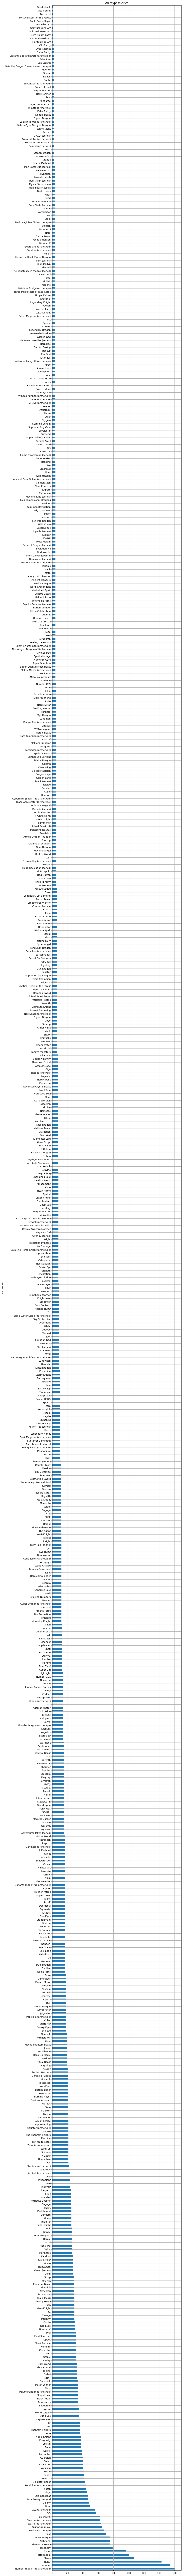

In [77]:
exploded_archseries["Archseries"].value_counts().plot.barh(
    figsize=(10, 200), grid=True, title="Archtypes/Series"
)
plt.show()

### By card type

In [78]:
archseries_crosstab = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Card type"], margins=True
)
archseries_crosstab

Card type           Monster Card  Spell Card  Trap Card   All
Archseries                                                   
"C"                            9           0          0     9
-Eyes Dragon                  75           0          0    75
/Assault Mode                  7           0          0     7
@Ignister                     18           0          0    18
A-to-Z                        16           0          0    16
...                          ...         ...        ...   ...
Zexal                         20           5          1    26
Zombie counterpart            19           0          2    21
Zoodiac                       12           1          2    15
Zubaba                         5           0          0     5
All                         7589        1448        962  9999

[740 rows x 4 columns]

### By primary type

In [79]:
archseries_crosstab_b = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Primary type"], margins=True
)
archseries_crosstab_b

Primary type        Effect Monster  Fusion Monster  Link Monster  \
Archseries                                                         
"C"                              8               0             0   
-Eyes Dragon                    32              12             1   
/Assault Mode                    7               0             0   
@Ignister                       10               1             4   
A-to-Z                           6               8             0   
...                            ...             ...           ...   
Zexal                           16               0             0   
Zombie counterpart               9               0             0   
Zoodiac                          6               0             0   
Zubaba                           4               0             0   
All                           4874             571           355   

Primary type        Normal Monster  Ritual Monster  Synchro Monster  \
Archseries                                                            
"C"                              1               0                0   
-Eyes Dragon                     3               4                5   
/Assault Mode                    0               0                0   
@Ignister                        0               1                1   
A-to-Z                           2               0                0   
...                            ...             ...              ...   
Zexal                            0               0                0   
Zombie counterpart               3               0                7   
Zoodiac                          0               0                0   
Zubaba                           0               0                0   
All                            221             130              468   

Primary type        Xyz Monster   All  
Archseries                             
"C"                           0     9  
-Eyes Dragon                 18    75  
/Assault Mode                 0     7  
@Ignister                     1    18  
A-to-Z                        0    16  
...                         ...   ...  
Zexal                         4    20  
Zombie counterpart            0    19  
Zoodiac                       6    12  
Zubaba                        1     5  
All                         966  7585  

[671 rows x 8 columns]



### By secondary type

In [80]:
exploded_archseries_secondary_type = exploded_archseries[
    ["Archseries", "Secondary type"]
].explode("Secondary type")
archseries_crosstab_c = pd.crosstab(
    exploded_archseries_secondary_type["Archseries"],
    exploded_archseries_secondary_type["Secondary type"],
    margins=True,
)
archseries_crosstab_c

Secondary type      Flip monster  Gemini monster  Spirit monster  \
Archseries                                                         
-Eyes Dragon                   0               2               0   
@Ignister                      0               0               0   
A-to-Z                         0               0               0   
Adamancipator                  0               0               0   
Alien                          1               1               0   
...                          ...             ...             ...   
X-Saber                        0               0               0   
Yang Zing                      0               0               0   
Yo-kai Girl                    0               0               0   
Zombie counterpart             1               1               1   
All                          129              28              15   

Secondary type      Toon monster  Tuner monster  Union monster  All  
Archseries                                                           
-Eyes Dragon                   2              0              0    4  
@Ignister                      0              1              0    1  
A-to-Z                         0              0              6    6  
Adamancipator                  0              3              0    3  
Alien                          0              1              0    3  
...                          ...            ...            ...  ...  
X-Saber                        0              4              0    4  
Yang Zing                      0              3              0    3  
Yo-kai Girl                    0              6              0    6  
Zombie counterpart             0              4              0    7  
All                           36            479             18  705  

[206 rows x 7 columns]

### By monster type

In [81]:
archseries_crosstab_d = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Monster type"], margins=True
)
archseries_crosstab_d

Monster type        Aqua  Beast  Beast-Warrior  Creator God  Cyberse  \
Archseries                                                             
"C"                    0      0              0            0        0   
-Eyes Dragon           0      0              0            0        0   
/Assault Mode          0      0              0            0        0   
@Ignister              0      0              0            0       18   
A-to-Z                 0      0              0            0        0   
...                  ...    ...            ...          ...      ...   
Zexal                  1      7              0            0        0   
Zombie counterpart     0      0              0            0        0   
Zoodiac                0      0             12            0        0   
Zubaba                 0      0              0            0        0   
All                  201    306            191            2      165   

Monster type        Dinosaur  Divine-Beast  Dragon  Fairy  Fiend  Fish  \
Archseries                                                               
"C"                        0             0       0      0      0     0   
-Eyes Dragon               0             0      70      0      0     0   
/Assault Mode              0             0       2      0      0     0   
@Ignister                  0             0       0      0      0     0   
A-to-Z                     0             0       0      0      0     0   
...                      ...           ...     ...    ...    ...   ...   
Zexal                      0             0       2      1      1     0   
Zombie counterpart         0             0       0      0      0     0   
Zoodiac                    0             0       0      0      0     0   
Zubaba                     0             0       0      0      0     0   
All                       93            12     752    466    737    76   

Monster type        Illusion  Insect  Machine  Plant  Psychic  Pyro  Reptile  \
Archseries                                                                     
"C"                        0       9        0      0        0     0        0   
-Eyes Dragon               0       0        2      0        0     0        0   
/Assault Mode              0       0        1      0        1     0        0   
@Ignister                  0       0        0      0        0     0        0   
A-to-Z                     0       0       16      0        0     0        0   
...                      ...     ...      ...    ...      ...   ...      ...   
Zexal                      0       0        0      0        0     0        0   
Zombie counterpart         0       0        0      0        0     0        0   
Zoodiac                    0       0        0      0        0     0        0   
Zubaba                     0       0        0      0        0     0        0   
All                        3     165     1033    184      159   109      143   

Monster type        Rock  Sea Serpent  Spellcaster  Thunder  Warrior  \
Archseries                                                             
"C"                    0            0            0        0        0   
-Eyes Dragon           0            0            0        0        0   
/Assault Mode          0            0            1        0        1   
@Ignister              0            0            0        0        0   
A-to-Z                 0            0            0        0        0   
...                  ...          ...          ...      ...      ...   
Zexal                  0            0            0        0        6   
Zombie counterpart     0            0            0        0        0   
Zoodiac                0            0            0        0        0   
Zubaba                 0            0            0        0        5   
All                  221           71          599      100     1286   

Monster type        Winged Beast  Wyrm  Zombie   All  
Archseries                                            
"C"         

### By property

In [82]:
archseries_crosstab_e = pd.crosstab(
    exploded_archseries["Archseries"], exploded_archseries["Property"], margins=True
)
archseries_crosstab_e

Property            Continuous Spell Card  Continuous Trap Card  \
Archseries                                                        
A.I.                                    1                     3   
Abyss Actor                             0                     0   
Abyss Script                            1                     0   
Abyss-                                  0                     1   
Adamancipator                           0                     0   
...                                   ...                   ...   
Zera                                    0                     0   
Zexal                                   0                     0   
Zombie counterpart                      0                     2   
Zoodiac                                 1                     1   
All                                   258                   302   

Property            Counter Trap Card  Equip Spell Card  Field Spell Card  \
Archseries                                                                  
A.I.                                0                 0                 1   
Abyss Actor                         0                 0                 0   
Abyss Script                        0                 0                 0   
Abyss-                              0                 3                 0   
Adamancipator                       1                 0                 1   
...                               ...               ...               ...   
Zera                                0                 0                 0   
Zexal                               0                 0                 1   
Zombie counterpart                  0                 0                 0   
Zoodiac                             0                 0                 0   
All                                85               138               191   

Property            Normal Spell Card  Normal Trap Card  \
Archseries                                                
A.I.                                4                 1   
Abyss Actor                         1                 2   
Abyss Script                        5                 0   
Abyss-                              0                 3   
Adamancipator                       2                 1   
...                               ...               ...   
Zera                                0                 0   
Zexal                               4                 1   
Zombie counterpart                  0                 0   
Zoodiac                             0                 1   
All                               541               575   

Property            Quick-Play Spell Card  Ritual Spell Card   All  
Archseries                                                          
A.I.                                    2                  1    13  
Abyss Actor                             0                  0     3  
Abyss Script                            1                  0     7  
Abyss-                                  0                  0     7  
Adamancipator                           0                  0     5  
...                                   ...                ...   ...  
Zera                                    0                  1     1  
Zexal                                   0                  0     6  
Zombie counterpart                      0                  0     2  
Zoodiac                                 0                  0     3  
All                                   279                 41  2410  

[418 rows x 10 columns]

## Artworks

In [83]:
print(
    "Total number of cards with edited or alternate artworks:",
    cards_df["Artwork"].count(),
)

Total number of cards with edited or alternate artworks:

641

In [84]:
cards_df[["Name", "Password", "TCG status", "OCG status", "Artwork"]][
    cards_df["Artwork"].notna()
]

Name  Password TCG status OCG status    Artwork
18           A Deal with Dark Ruler  06850209  Unlimited  Unlimited  (Edited,)
32      A-to-Z-Dragon Buster Cannon  65172015  Unlimited  Unlimited  (Edited,)
51                     Absolute End  27744077  Unlimited  Unlimited  (Edited,)
57       Absorbing Kid from the Sky  49771608  Unlimited  Unlimited  (Edited,)
67     Abyss Actor - Mellow Madonna  78310590  Unlimited  Unlimited  (Edited,)
...                             ...       ...        ...        ...        ...
12408         Yorishiro of the Aqua  57511992  Unlimited  Unlimited  (Edited,)
12522                       Zombino  14575467  Unlimited  Unlimited  (Edited,)
12524              Zombyra the Dark  88472456  Unlimited  Unlimited  (Edited,)
12526               Zoodiac Barrage  46060017  Forbidden    Limited  (Edited,)
12529            Zoodiac Bunnyblast  04367330  Unlimited  Unlimited  (Edited,)

[641 rows x 5 columns]

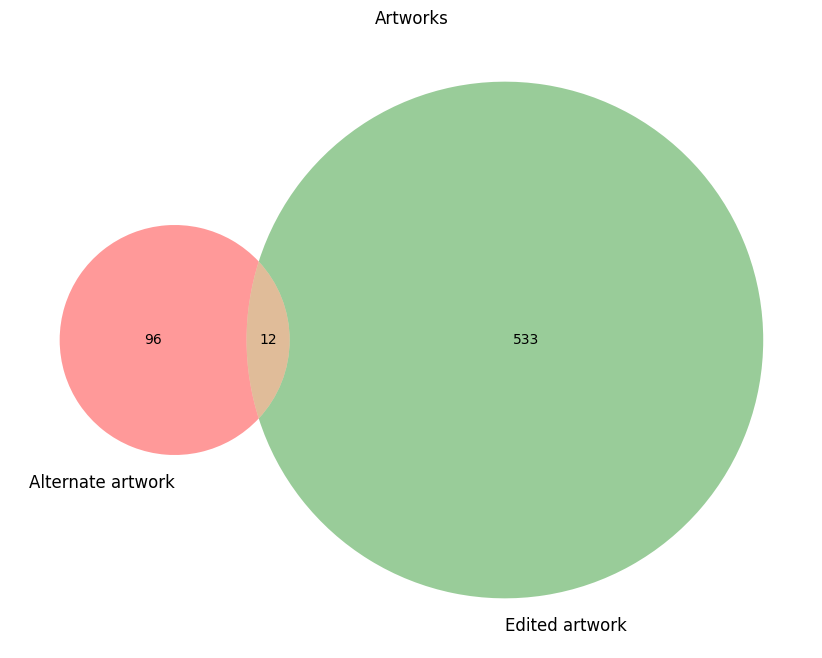

In [85]:
artwork_value_counts = cards_df["Artwork"].value_counts()
plt.figure(figsize=(20, 8))
plt.title("Artworks")
venn2(
    subsets=(
        artwork_value_counts[("Alternate",)],
        artwork_value_counts[("Edited",)],
        artwork_value_counts[("Alternate", "Edited")],
    ),
    set_labels=("Alternate artwork", "Edited artwork"),
)
plt.show()

### By card type

In [86]:
artwork_crosstab = pd.crosstab(cards_df["Artwork"], cards_df["Card type"])
artwork_crosstab

Card type            Monster Card  Spell Card  Trap Card
Artwork                                                 
(Alternate,)                   84           7          5
(Alternate, Edited)            11           1          0
(Edited,)                     301         122        110

### By primary type

In [87]:
artwork_crosstab_b = pd.crosstab(cards_df["Artwork"], cards_df["Primary type"])
artwork_crosstab_b

Primary type         Effect Monster  Fusion Monster  Link Monster  \
Artwork                                                             
(Alternate,)                     37              13             9   
(Alternate, Edited)               3               1             5   
(Edited,)                       196              23            10   

Primary type         Normal Monster  Ritual Monster  Synchro Monster  \
Artwork                                                                
(Alternate,)                     16               0                4   
(Alternate, Edited)               2               0                0   
(Edited,)                        43               7                5   

Primary type         Xyz Monster  
Artwork                           
(Alternate,)                   5  
(Alternate, Edited)            0  
(Edited,)                     17

More granularity is unnecessary

## Errata

In [88]:
print("Total number of cards with errata:", cards_df["Errata"].count())

Total number of cards with errata:

4803

In [89]:
cards_df[["Name", "Password", "TCG status", "OCG status", "Errata"]][
    cards_df["Errata"].notna()
]

Name  Password TCG status OCG status   Errata
0          "A" Cell Breeding Device  34541863  Unlimited  Unlimited  (Name,)
5      "Infernoble Arms - Durendal"  37478723  Unlimited  Unlimited   (Any,)
10                   3-Hump Lacooda  86988864  Unlimited  Unlimited   (Any,)
12        4-Starred Ladybug of Doom  83994646  Unlimited  Unlimited   (Any,)
15                      7 Completed  86198326  Unlimited  Unlimited  (Type,)
...                             ...       ...        ...        ...      ...
12536                Zoodiac Ramram  04145852  Unlimited  Unlimited   (Any,)
12540              Zoodiac Whiptail  31755044  Unlimited  Unlimited   (Any,)
12543                 Zubaba Buster  57036718  Unlimited  Unlimited   (Any,)
12545                 Zubaba Knight  97896503  Unlimited  Unlimited   (Any,)
12548    Zure, Knight of Dark World  07459013  Unlimited  Unlimited  (Type,)

[4803 rows x 5 columns]

In [90]:
errata_counts = (
    cards_df.groupby("Errata").nunique().sort_values("Name", ascending=False)
)
errata_counts

Name  Password  Card type  Property  Archseries  Effect type  \
Errata                                                                       
(Any,)        3489      3484          3         9         633          217   
(Type,)        808       808          3         9         190           82   
(Name,)        379       379          3         9         127           72   
(Name, Type)   119       118          3         6          58           36   

              TCG status  OCG status  Page name  Page URL  Artwork  \
Errata                                                               
(Any,)                 5           5       3491      3491        3   
(Type,)                4           5        810       810        3   
(Name,)                4           3        379       379        2   
(Name, Type)           5           4        123       123        3   

              Modification date  Attribute  Primary type  Secondary type  \
Errata                                                                     
(Any,)                     3477          7             7               8   
(Type,)                     809          7             7               6   
(Name,)                     379          6             7               3   
(Name, Type)                123          7             6               5   

              Monster type  DEF  Pendulum Scale  Link  Link Arrows  ATK  \
Errata                                                                    
(Any,)                  24   59               9     4           10   69   
(Type,)                 24   46               5     2            2   58   
(Name,)                 22   37               3     1            1   43   
(Name, Type)            18   31               0     0            0   36   

              Level/Rank  
Errata                    
(Any,)                13  
(Type,)               12  
(Name,)               11  
(Name, Type)          10

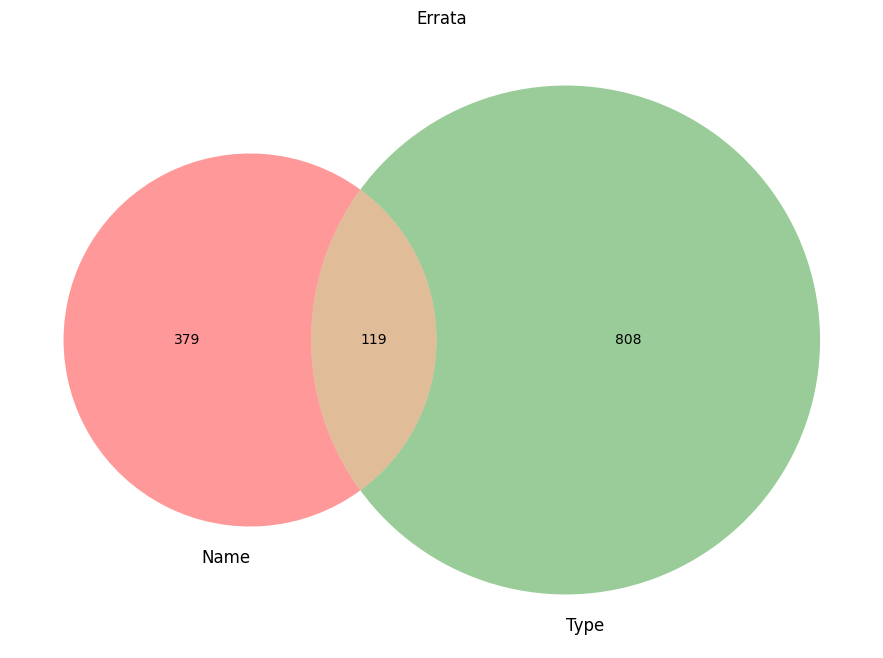

In [91]:
plt.figure(figsize=(20, 8))
plt.title("Errata")
sorted_errata_name_counts = (
    errata_counts["Name"]
    .drop(("Any",))
    .sort_index(key=lambda x: [(len(i), i) for i in x])
)
venn2(
    subsets=sorted_errata_name_counts,
    set_labels=sorted_errata_name_counts.index[:-1].str[0],
)
plt.show()

### By card type

In [92]:
errata_crosstab = pd.crosstab(cards_df["Errata"], cards_df["Card type"])
errata_crosstab.sort_values(by=errata_crosstab.columns.tolist(), ascending=False)

Card type     Monster Card  Spell Card  Trap Card
Errata                                           
(Any,)                2167         681        643
(Type,)                584         216         10
(Name,)                272          56         51
(Name, Type)           103          19          1

### By primary type

In [93]:
errata_crosstab_b = pd.crosstab(cards_df["Errata"], cards_df["Primary type"])
errata_crosstab_b.sort_values(by=errata_crosstab_b.columns.tolist(), ascending=False)

Primary type  Effect Monster  Fusion Monster  Link Monster  Normal Monster  \
Errata                                                                       
(Any,)                  1650             129            16              29   
(Type,)                  332              29             2             171   
(Name,)                  184              46             4              20   
(Name, Type)              47               9             0              36   

Primary type  Ritual Monster  Synchro Monster  Xyz Monster  
Errata                                                      
(Any,)                    36              139          168  
(Type,)                    3               29           17  
(Name,)                    2                9            7  
(Name, Type)               3                5            1

More granularity is unnecessary

### By artwork

In [94]:
errata_crosstab_c = pd.crosstab(cards_df["Artwork"], cards_df["Errata"])
errata_crosstab_c.sort_values(by=errata_crosstab_c.columns.tolist(), ascending=False)

Errata               (Any,)  (Name,)  (Name, Type)  (Type,)
Artwork                                                    
(Edited,)               175       21            17       66
(Alternate,)             32        4            18       27
(Alternate, Edited)       1        0             2        3

## TCG & OCG status

### TGC status

In [95]:
print("Total number of TCG status:", cards_df["TCG status"].nunique())

Total number of TCG status:

6

In [96]:
cards_df.drop(columns=["Page name", "Page URL"]).groupby(
    "TCG status", dropna=False
).nunique()

Name  Password  Card type  Property  Archseries  \
TCG status                                                           
Forbidden           105       105          3         7          58   
Illegal              38         0          3         3           6   
Limited              79        79          3         6          43   
Not yet released      4         4          2         2           0   
Semi-Limited          8         8          2         3           7   
Unlimited         11945     11942          3         9        1209   
NaN                 370       321          3         8          79   

                  Effect type  OCG status  Artwork  Modification date  Errata  \
TCG status                                                                      
Forbidden                  49           4        1                105       4   
Illegal                     6           1        0                 38       3   
Limited                    37           4        3                 79       4   
Not yet released            3           1        0                  4       0   
Semi-Limited                8           2        1                  8       3   
Unlimited                 357           4        3              11906       4   
NaN                        69           3        0                370       2   

                  Attribute  Primary type  Secondary type  Monster type  DEF  \
TCG status                                                                     
Forbidden                 6             5               2            19   20   
Illegal                   6             5               0            14   12   
Limited                   6             6               2            15   18   
Not yet released          1             1               0             1    1   
Semi-Limited              3             1               1             3    3   
Unlimited                 7             7               8            25   75   
NaN                       7             7               3            24   38   

                  Pendulum Scale  Link  Link Arrows  ATK  Level/Rank  
TCG status                                                            
Forbidden                      2     4           11   28          12  
Illegal                        2     2            2   11           5  
Limited                        2     1            1   23           9  
Not yet released               0     0            0    1           1  
Semi-Limited                   0     0            0    3           3  
Unlimited                     14     6           61   80          14  
NaN                            4     3            6   56          11

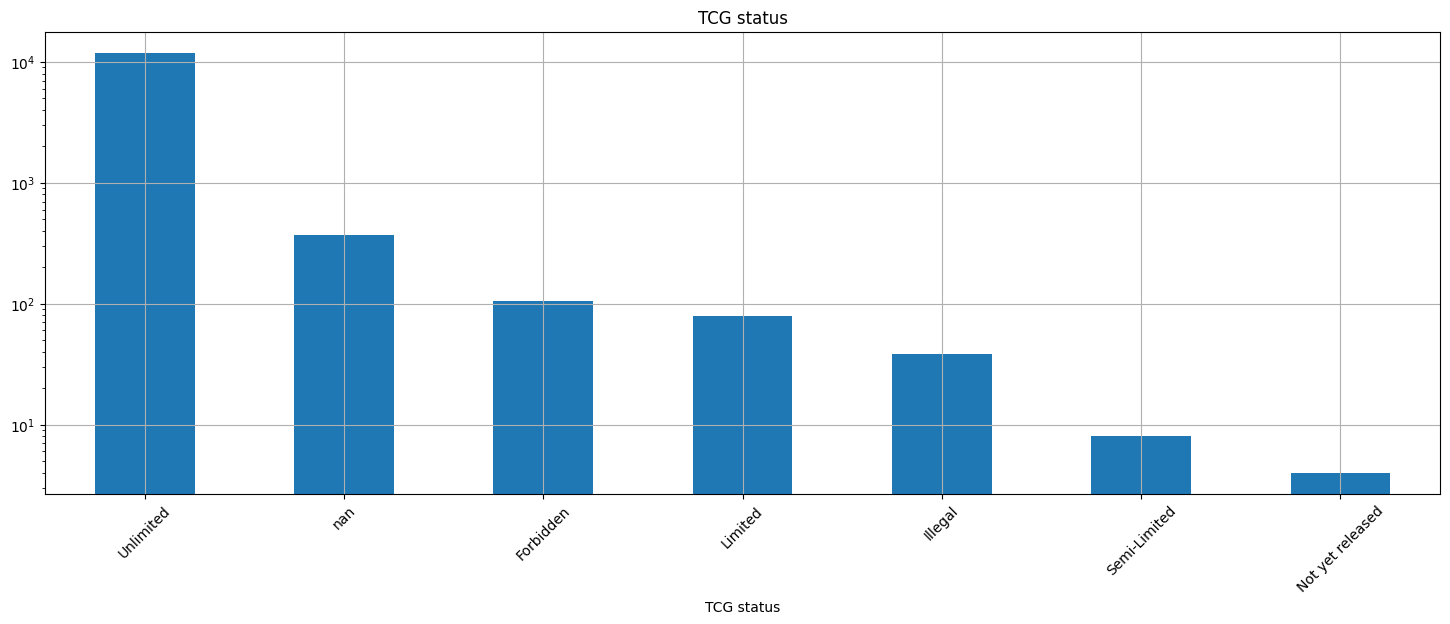

In [97]:
cards_df["TCG status"].value_counts(dropna=False).plot.bar(
    figsize=(18, 6), logy=True, grid=True, rot=45, title="TCG status"
)
plt.show()

#### By card type

In [98]:
# Remove unlimited
tcg_crosstab = pd.crosstab(cards_df["Card type"], cards_df["TCG status"]).drop(
    ["Unlimited"], axis=1
)
tcg_crosstab

TCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         67       35       45                 1             3
Spell Card           26        2       31                 0             5
Trap Card            12        1        3                 3             0

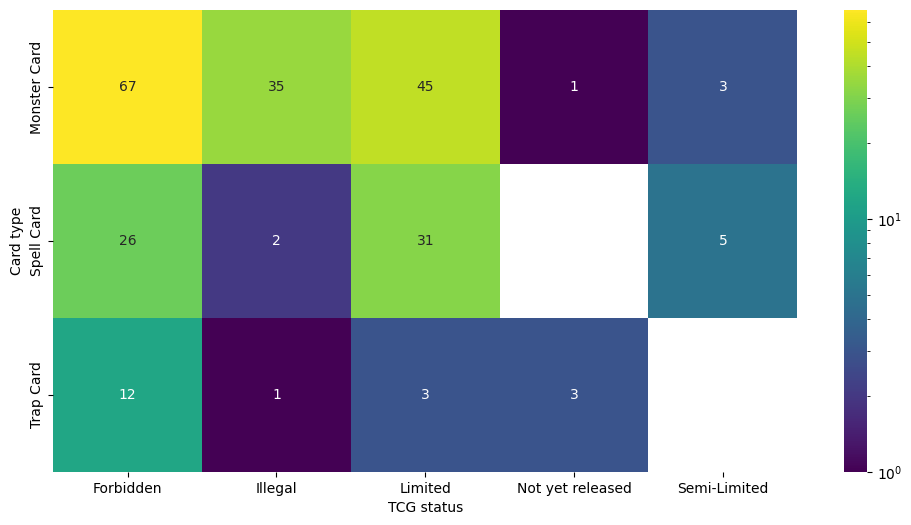

In [99]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    tcg_crosstab[tcg_crosstab > 0],
    annot=True,
    fmt="g",
    cmap="viridis",
    norm=mc.LogNorm(),
)
plt.show()

#### By monster type

In [100]:
# Remove unlimited
tcg_crosstab_b = pd.crosstab(cards_df["Monster type"], cards_df["TCG status"]).drop(
    ["Unlimited"], axis=1
)
tcg_crosstab_b

TCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   2        0        4                 0             0
Beast                  0        3        2                 0             0
Beast-Warrior          2        3        2                 0             0
Cyberse                2        0        2                 0             0
Dinosaur               0        0        2                 0             0
Divine-Beast           0        3        0                 0             0
Dragon                 9        3        7                 0             0
Fairy                  4        4        5                 0             1
Fiend                  5        2        2                 0             0
Fish                   1        0        0                 0             0
Illusion               0        0        0                 0             0
Insect                 2        0        0                 0             0
Machine                8        4        2                 0             0
Plant                  5        1        0                 0             0
Psychic                3        1        2                 0             1
Pyro                   0        0        0                 0             0
Reptile                1        0        1                 1             0
Rock                   2        1        4                 0             0
Sea Serpent            1        0        0                 0             0
Spellcaster            8        5        7                 0             0
Thunder                2        1        0                 0             0
Warrior                4        2        2                 0             1
Winged Beast           3        2        0                 0             0
Wyrm                   3        0        1                 0             0
Zombie                 0        0        0                 0             0

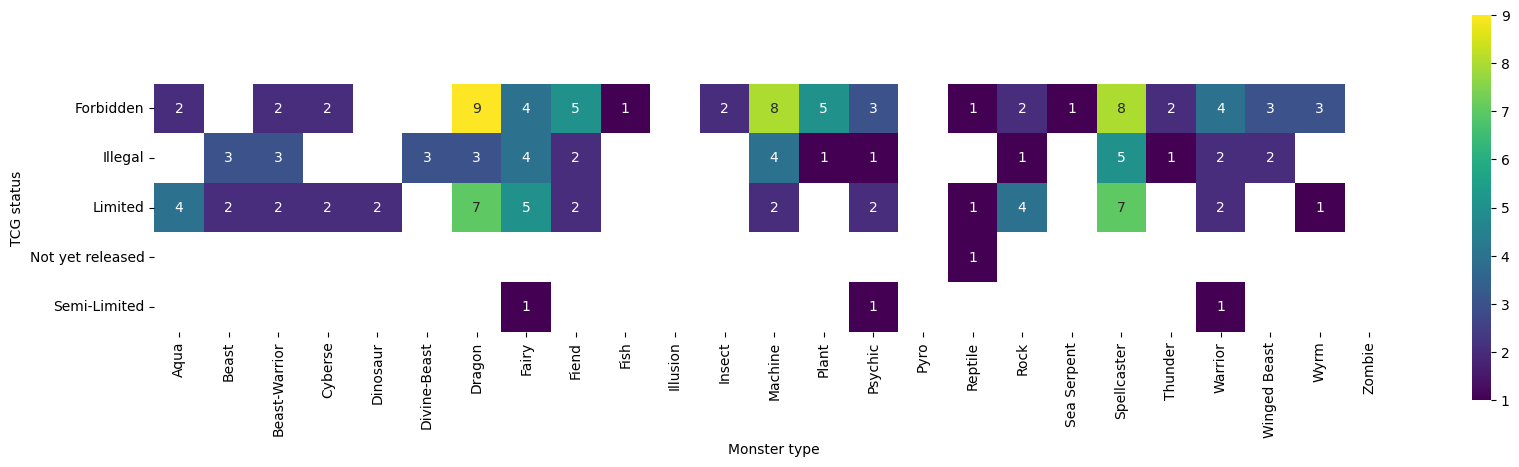

In [101]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    tcg_crosstab_b[tcg_crosstab_b > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
)
plt.show()

#### By archseries

In [102]:
# Remove unlimited
tcg_crosstab_c = pd.crosstab(
    exploded_archseries["Archseries"].where(
        exploded_archseries["OCG status"] != "Unlimited"
    ),
    exploded_archseries["TCG status"],
    margins=True,
)
tcg_crosstab_c

TCG status                 Forbidden  Illegal  Limited  Semi-Limited  \
Archseries                                                             
-Eyes Dragon                       1        0        0             0   
Adventurer Token (series)          0        0        0             0   
Amazoness                          0        0        0             0   
Attribute Knight                   0        0        1             0   
Barrier Statue                     1        0        0             0   
...                              ...      ...      ...           ...   
X-Saber                            1        0        0             0   
Xyz (archetype)                    0        0        0             0   
Zexal                              1        0        0             0   
Zoodiac                            3        0        1             0   
All                               63       39       36             8   

TCG status                 Unlimited  All  
Archseries                                 
-Eyes Dragon                       0    1  
Adventurer Token (series)          2    2  
Amazoness                          1    1  
Attribute Knight                   0    1  
Barrier Statue                     0    1  
...                              ...  ...  
X-Saber                            0    1  
Xyz (archetype)                    1    1  
Zexal                              0    1  
Zoodiac                            0    4  
All                              103  249  

[115 rows x 6 columns]

### OCG status

In [103]:
print("Total number of OCG status:", cards_df["OCG status"].nunique())

Total number of OCG status:

6

In [104]:
cards_df.drop(columns=["Page name", "Page URL"]).groupby(
    "OCG status", dropna=False
).nunique()

Name  Password  Card type  Property  Archseries  \
OCG status                                                           
Forbidden            88        88          3         6          46   
Illegal              32         1          3         2           8   
Limited              81        81          3         7          43   
Not yet released     21         1          3         6           6   
Semi-Limited         19        19          2         4          12   
Unlimited         12221     12198          3         9        1224   
NaN                  83        71          3         6          14   

                  Effect type  TCG status  Artwork  Modification date  Errata  \
OCG status                                                                      
Forbidden                  41           3        1                 88       4   
Illegal                     8           1        0                 32       3   
Limited                    39           4        3                 81       3   
Not yet released           15           0        0                 21       0   
Semi-Limited               13           4        2                 19       3   
Unlimited                 363           4        3              12186       4   
NaN                        31           2        0                 83       2   

                  Attribute  Primary type  Secondary type  Monster type  DEF  \
OCG status                                                                     
Forbidden                 6             5               3            19   19   
Illegal                   6             6               1            12   15   
Limited                   6             6               2            15   22   
Not yet released          4             3               1            10   13   
Semi-Limited              3             2               1             5    5   
Unlimited                 7             7               8            26   76   
NaN                       6             5               1            20   25   

                  Pendulum Scale  Link  Link Arrows  ATK  Level/Rank  
OCG status                                                            
Forbidden                      2     4            8   24          11  
Illegal                        2     2            2   14           8  
Limited                        3     1            1   21           9  
Not yet released               0     1            1   12           6  
Semi-Limited                   0     1            1    6           4  
Unlimited                     13     6           61   81          14  
NaN                            1     1            2   24          11

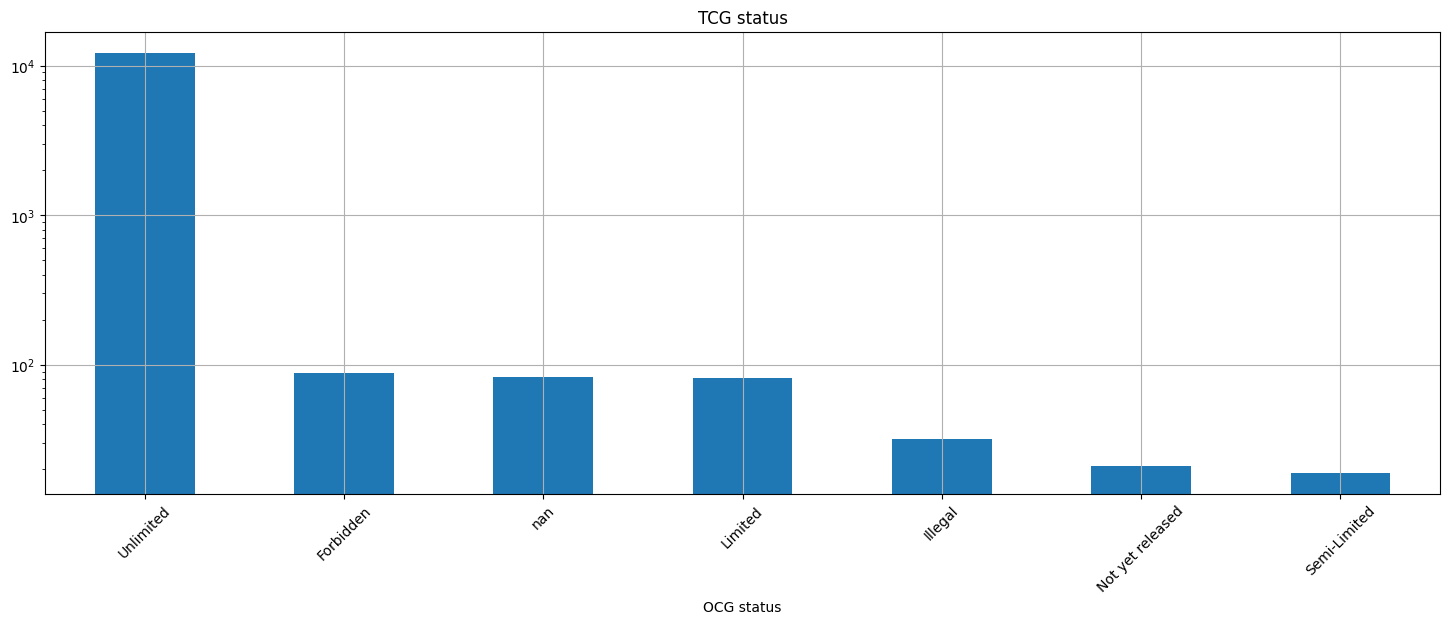

In [105]:
cards_df["OCG status"].value_counts(dropna=False).plot.bar(
    figsize=(18, 6), logy=True, grid=True, rot=45, title="TCG status"
)
plt.show()

#### By card type

In [106]:
# Remove unlimited
ocg_crosstab = pd.crosstab(cards_df["Card type"], cards_df["OCG status"]).drop(
    ["Unlimited"], axis=1
)
ocg_crosstab

OCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Card type                                                                
Monster Card         56       30       47                14             7
Spell Card           22        1       30                 5            12
Trap Card            10        1        4                 2             0

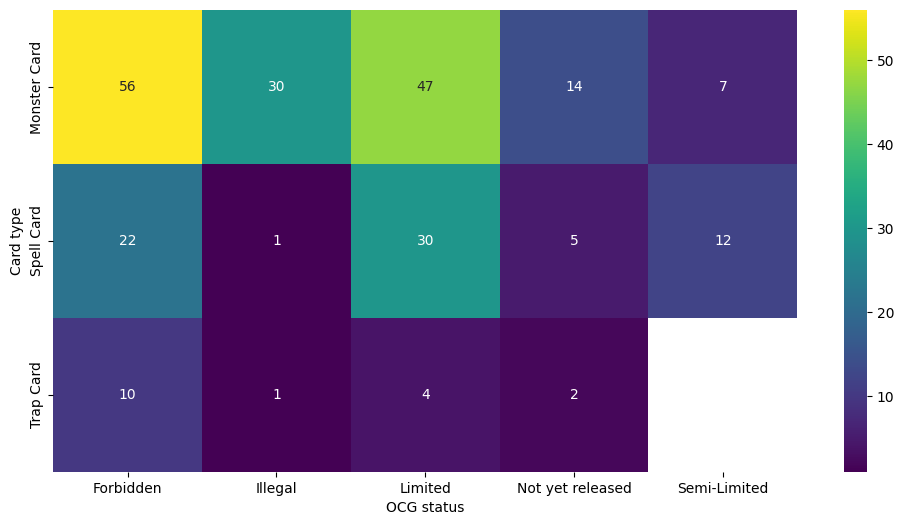

In [107]:
plt.figure(figsize=(12, 6))
sns.heatmap(ocg_crosstab[ocg_crosstab > 0], annot=True, fmt="g", cmap="viridis")
plt.show()

#### By monster type

In [108]:
ocg_crosstab_b = pd.crosstab(cards_df["Monster type"], cards_df["OCG status"]).drop(
    ["Unlimited"], axis=1
)
ocg_crosstab_b

OCG status     Forbidden  Illegal  Limited  Not yet released  Semi-Limited
Monster type                                                              
Aqua                   3        0        3                 0             0
Beast                  0        2        1                 2             0
Beast-Warrior          3        2        1                 0             1
Creator God            0        0        0                 0             0
Cyberse                2        0        1                 0             0
Dinosaur               0        0        1                 0             0
Divine-Beast           0        3        0                 0             0
Dragon                 8        3        8                 1             0
Fairy                  2        3        6                 1             0
Fiend                  5        1        0                 1             0
Fish                   1        0        0                 0             0
Illusion               0        0        0                 0             0
Insect                 1        0        0                 0             0
Machine                7        3        5                 1             1
Plant                  4        0        2                 0             0
Psychic                2        1        4                 0             0
Pyro                   0        0        1                 1             0
Reptile                1        0        0                 0             0
Rock                   1        1        1                 0             2
Sea Serpent            1        0        0                 0             0
Spellcaster            7        7        8                 2             1
Thunder                1        0        3                 0             0
Warrior                2        3        2                 2             2
Winged Beast           3        1        0                 1             0
Wyrm                   2        0        0                 1             0
Zombie                 0        0        0                 0             0

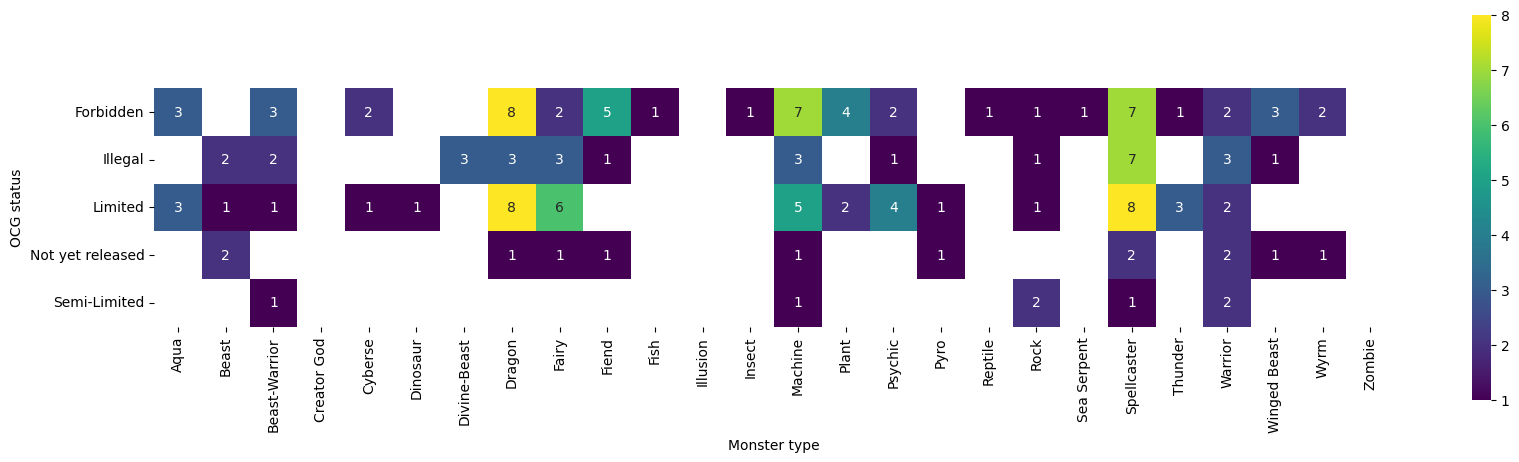

In [109]:
plt.figure(figsize=(20, 5))
sns.heatmap(
    ocg_crosstab_b[ocg_crosstab_b > 0].T,
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
)
plt.show()

#### By archseries

In [110]:
# Remove unlimited
ocg_crosstab_c = pd.crosstab(
    exploded_archseries["Archseries"].where(
        exploded_archseries["OCG status"] != "Unlimited"
    ),
    exploded_archseries["OCG status"],
    margins=True,
)
ocg_crosstab_c

OCG status                 Forbidden  Illegal  Limited  Not yet released  \
Archseries                                                                 
-Eyes Dragon                       1        0        0                 0   
Adventurer Token (series)          1        0        0                 0   
Amazoness                          1        0        0                 0   
Armored Xyz (archetype)            0        0        0                 1   
Attribute Knight                   0        0        0                 0   
...                              ...      ...      ...               ...   
Xyz (archetype)                    0        0        0                 1   
ZEXAL shout                        0        3        0                 0   
Zexal                              1        0        0                 0   
Zoodiac                            2        0        2                 0   
All                               72       33       73                21   

OCG status                 Semi-Limited  All  
Archseries                                    
-Eyes Dragon                          0    1  
Adventurer Token (series)             1    2  
Amazoness                             0    1  
Armored Xyz (archetype)               0    1  
Attribute Knight                      1    1  
...                                 ...  ...  
Xyz (archetype)                       0    1  
ZEXAL shout                           0    3  
Zexal                                 0    1  
Zoodiac                               0    4  
All                                  13  212  

[111 rows x 6 columns]

### TCG vs. OCG status

In [111]:
cg_crosstab = pd.crosstab(
    cards_df["OCG status"], cards_df["TCG status"], dropna=False, margins=False
)
cg_crosstab

TCG status    Forbidden  Illegal  Limited  Not yet released  Semi-Limited  \
OCG status                                                                  
Forbidden            72        0        3                 0             0   
Illegal               0       26        0                 0             0   
Limited               8        0       40                 0             4   
Semi-Limited          3        0        3                 0             4   
Unlimited            22        0       33                 4             0   

TCG status    Unlimited  
OCG status               
Forbidden            13  
Illegal               0  
Limited              29  
Semi-Limited          9  
Unlimited         11825

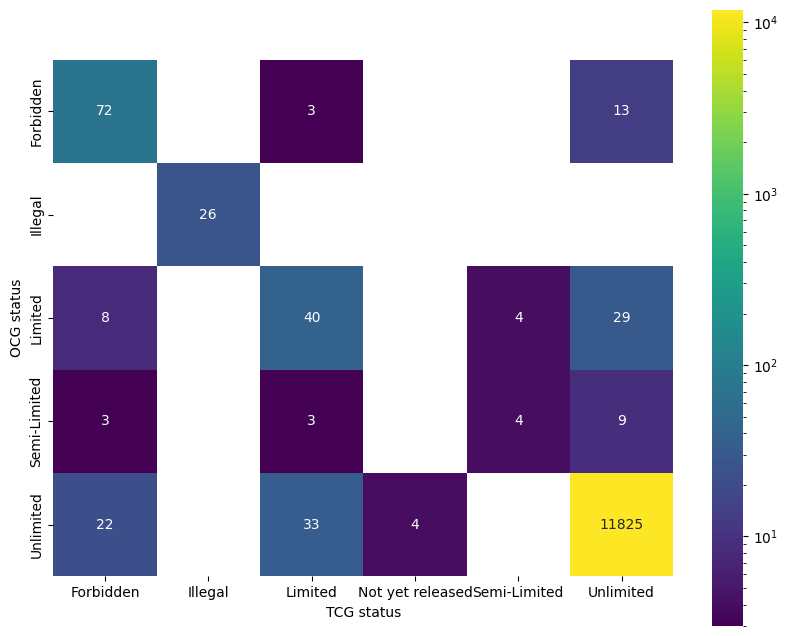

In [112]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    cg_crosstab[cg_crosstab > 0],
    annot=True,
    fmt="g",
    cmap="viridis",
    square=True,
    norm=mc.LogNorm(),
)
plt.show()

# Extras

## Multiple secondary types

In [113]:
cards_df.dropna(subset="Secondary type", axis=0)[
    [len(x) > 1 for x in cards_df["Secondary type"].dropna()]
]

Name  Password     Card type Property  \
9436                   Scapeghost  67284107  Monster Card      NaN   
9605               Shaddoll Falco  37445295  Monster Card      NaN   
11261            Torque Tune Gear  79538761  Monster Card      NaN   
11474  Turbo-Tainted Hot Rod GT19  16769305  Monster Card      NaN   

                  Archseries  \
9436   (Zombie counterpart,)   
9605             (Shaddoll,)   
11261                    NaN   
11474                    NaN   

                                             Effect type TCG status  \
9436                                      (Flip effect,)  Unlimited   
9605            (Condition, Flip effect, Trigger Effect)  Unlimited   
11261  (Continuous-like Effect, Ignition Effect, Igni...  Unlimited   
11474          (Condition, Quick Effect, Trigger Effect)  Unlimited   

      OCG status                   Page name  \
9436   Unlimited                  Scapeghost   
9605   Unlimited              Shaddoll Falco   
11261  Unlimited            Torque Tune Gear   
11474  Unlimited  Turbo-Tainted Hot Rod GT19   

                                                Page URL Artwork  \
9436               https://yugipedia.com/wiki/Scapeghost     NaN   
9605           https://yugipedia.com/wiki/Shaddoll_Falco     NaN   
11261        https://yugipedia.com/wiki/Torque_Tune_Gear     NaN   
11474  https://yugipedia.com/wiki/Turbo-Tainted_Hot_R...     NaN   

        Modification date  Errata Attribute    Primary type  \
9436  2023-03-20 07:07:57  (Any,)      DARK  Effect Monster   
9605  2023-03-20 07:49:31  (Any,)      DARK  Effect Monster   
11261 2023-03-20 15:54:58  (Any,)     LIGHT  Effect Monster   
11474 2023-03-20 16:55:36     NaN      FIRE  Effect Monster   

                       Secondary type Monster type   DEF Pendulum Scale Link  \
9436    (Flip monster, Tuner monster)       Zombie     0            NaN  NaN   
9605    (Flip monster, Tuner monster)  Spellcaster  1400            NaN  NaN   
11261  (Tuner monster, Union monster)      Machine     0            NaN  NaN   
11474   (Flip monster, Tuner monster)      Machine  1500            NaN  NaN   

      Link Arrows  ATK Level/Rank  
9436          NaN    0          1  
9605          NaN  600          2  
11261         NaN    0          1  
11474         NaN  500          3

## Not yet released

In [114]:
cards_df.loc[cards_df["OCG status"] == "Not yet released"].loc[
    full_df["TCG status"] == "Not yet released"
]

Empty DataFrame
Columns: [Name, Password, Card type, Property, Archseries, Effect type, TCG status, OCG status, Page name, Page URL, Artwork, Modification date, Errata, Attribute, Primary type, Secondary type, Monster type, DEF, Pendulum Scale, Link, Link Arrows, ATK, Level/Rank]
Index: []

## Counters and Tokens

In [115]:
token_df.dropna(how="all", axis=1)

Name     Card type       Archseries Attribute  \
0     Albaz the Shrouded       Counter              NaN       NaN   
1     Albaz the Shrouded       Counter              NaN       NaN   
2    Aluber the Dogmatic       Counter              NaN       NaN   
3    Aluber the Dogmatic       Counter              NaN       NaN   
4     Ancient Gear Token  Monster Card  (Ancient Gear,)     EARTH   
..                   ...           ...              ...       ...   
125          Tri-Brigade       Counter              NaN       NaN   
126      Trickstar Token  Monster Card     (Trickstar,)     LIGHT   
127         Valley Token  Monster Card              NaN       NaN   
128        Wedge Counter       Counter              NaN       NaN   
129   World Legacy Token  Monster Card  (World Legacy,)      DARK   

      Primary type Monster type Effect type  DEF  ATK Level/Rank TCG status  \
0    Monster Token          NaN         NaN  NaN  NaN        NaN      Legal   
1              NaN          NaN         NaN  NaN  NaN        NaN      Legal   
2    Monster Token          NaN         NaN  NaN  NaN        NaN      Legal   
3              NaN          NaN         NaN  NaN  NaN        NaN      Legal   
4    Monster Token      Machine         NaN    0    0          1      Legal   
..             ...          ...         ...  ...  ...        ...        ...   
125            NaN          NaN         NaN  NaN  NaN        NaN      Legal   
126  Monster Token        Fairy         NaN    0    0          1      Legal   
127  Monster Token          NaN         NaN  NaN  NaN        NaN        NaN   
128            NaN          NaN         NaN  NaN  NaN        NaN        NaN   
129  Monster Token      Machine         NaN    0    0          1      Legal   

    OCG status             Page name  \
0        Legal    Albaz the Shrouded   
1        Legal    Albaz the Shrouded   
2        Legal   Aluber the Dogmatic   
3        Legal   Aluber the Dogmatic   
4        Legal    Ancient Gear Token   
..         ...                   ...   
125      Legal    Tri-Brigade (card)   
126      Legal       Trickstar Token   
127      Legal          Valley Token   
128      Legal  Wedge Counter (card)   
129      Legal    World Legacy Token   

                                            Page URL Artwork  \
0      https://yugipedia.com/wiki/Albaz_the_Shrouded     NaN   
1      https://yugipedia.com/wiki/Albaz_the_Shrouded     NaN   
2     https://yugipedia.com/wiki/Aluber_the_Dogmatic     NaN   
3     https://yugipedia.com/wiki/Aluber_the_Dogmatic     NaN   
4      https://yugipedia.com/wiki/Ancient_Gear_Token     NaN   
..                                               ...     ...   
125    https://yugipedia.com/wiki/Tri-Brigade_(card)     NaN   
126       https://yugipedia.com/wiki/Trickstar_Token     NaN   
127          https://yugipedia.com/wiki/Valley_Token     NaN   
128  https://yugipedia.com/wiki/Wedge_Counter_(card)     NaN   
129    https://yugipedia.com/wiki/World_Legacy_Token     NaN   

      Modification date Errata  
0   2023-07-27 06:14:51    NaN  
1   2023-07-27 06:14:51    NaN  
2   2023-07-27 06:15:01    NaN  
3   2023-07-27 06:15:01    NaN  
4   2023-03-23 09:40:39    NaN  
..                  ...    ...  
125 2023-07-27 06:14:56    NaN  
126 2023-03-15 01:01:38    NaN  
127 2019-11-23 11:52:36    NaN  
128 2019-12-08 00:39:31    NaN  
129 2023-03-23 12:49:00    NaN  

[130 rows x 17 columns]

# Page name differs from card name

In [116]:
full_df[full_df["Name"] != full_df["Page name"]]

Name  Password     Card type  \
54                            Absolute Powerforce  51779204    Spell Card   
387                                  Ancient Gear  31557782  Monster Card   
1059                        Black Feather Counter       NaN       Counter   
1066                         Black Luster Soldier       NaN  Monster Card   
1467                                 Burning Soul  10723472    Spell Card   
...                                           ...       ...           ...   
11643                                   Tyhone #2  56789759  Monster Card   
12176                               Wedge Counter       NaN       Counter   
12281  Winged Dragon, Guardian of the Fortress #1  87796900  Monster Card   
12282  Winged Dragon, Guardian of the Fortress #2  57405307  Monster Card   
12622                               Zera the Mant       NaN  Monster Card   

                    Property                                 Archseries  \
54     Quick-Play Spell Card                          (Signature move,)   
387                      NaN                            (Ancient Gear,)   
1059                     NaN                                        NaN   
1066                     NaN  (Black Luster Soldier (archetype), Chaos)   
1467   Quick-Play Spell Card                                        NaN   
...                      ...                                        ...   
11643                    NaN                                        NaN   
12176                    NaN                                        NaN   
12281                    NaN                                        NaN   
12282                    NaN                                        NaN   
12622                    NaN                                    (Zera,)   

                                 Effect type TCG status OCG status  \
54                                 (Effect,)        NaN  Unlimited   
387                   (Unclassified effect,)  Unlimited  Unlimited   
1059                                     NaN      Legal      Legal   
1066                                     NaN        NaN  Unlimited   
1467   (Condition, Effect, Lingering effect)  Unlimited  Unlimited   
...                                      ...        ...        ...   
11643                                    NaN  Unlimited  Unlimited   
12176                                    NaN        NaN      Legal   
12281                                    NaN  Unlimited  Unlimited   
12282                                    NaN  Unlimited  Unlimited   
12622                                    NaN        NaN  Unlimited   

                                       Page name  \
54                    Absolute Powerforce (card)   
387                          Ancient Gear (card)   
1059                Black Feather Counter (card)   
1066               Black Luster Soldier (Normal)   
1467                         Burning Soul (card)   
...                                          ...   
11643                                   Tyhone 2   
12176                       Wedge Counter (card)   
12281  Winged Dragon, Guardian of the Fortress 1   
12282  Winged Dragon, Guardian of the Fortress 2   
12622                     Zera the Mant (Normal)   

                                                Page URL Artwork  \
54     https://yugipedia.com/wiki/Absolute_Powerforce...     NaN   
387       https://yugipedia.com/wiki/Ancient_Gear_(card)     NaN   
1059   https://yugipedia.com/wiki/Black_Feather_Count...     NaN   
1066   https://yugipedia.com/wiki/Black_Luster_Soldie...     NaN   
1467      https://yugipedia.com/wiki/Burning_Soul_(card)     NaN   
...                                                  ...     ...   
11643                https://yugipedia.com/wiki/Tyhone_2     NaN   
12176    https://yugipedia.com/wiki/Wedge_Counter_(card)     NaN   
12281  https://yugipedia.com/wiki/Winged_Dragon,_Guar...     NaN   
12282  https://yugipedia.com/wiki/Winged_Dragon,_Guar...     NaN   
12622

# Epilogue

In [117]:
benchmark("cards", timestamp)

In [118]:
footer(timestamp)

<div align='right'>
    Execution completed 31/07/2023 09:51 UTC
</div>

## HTML export

In [119]:
# Save notebook on disck before generating HTML report
save_notebook()

Notebook saved to disk

In [120]:
! jupyter nbconvert Cards.ipynb --output-dir='../' --to=HTML --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags='exclude' --TemplateExporter.exclude_input=True --TemplateExporter.exclude_input_prompt=True --TemplateExporter.exclude_output_prompt=True

[NbConvertApp] Converting notebook Cards.ipynb to HTML


[NbConvertApp] Writing 4715427 bytes to ../Cards.html


## Git

In [ ]:
! git add "../*[Cc]ards*"

In [ ]:
! git commit -m {"'Cards update-" + timestamp.isoformat() + "'"}